<a href="https://colab.research.google.com/github/ari1idont/Gas_CNN/blob/main/gas8c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## data engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
"""
dict={
  0: Ammonia 50
  1: Ammonia 60
  2: Ammonia 70
  3: Ammonia 80
  4: Ammonia 90
  5: Ammonia 100
  6: Toluene 75 Ammonia 0 - 35
  7: Toluene 75 Ammonia 50
  8: Toluene 65 Ammonia 0-20
  9: Toluene 65 Ammonia 35
  10: Toluene 65 Ammonia 50
  11: Acetone 75 Ammonia 0-20
  12: Acetone 75 Ammonia 35
  13: Acetone 65 Ammonia 0-35
  14: Acetone 65 Ammonia 50
  15: formaldehyde 75 Ammonia 0-35
  16: formaldehyde 75 Ammonia 50
  17: formaldehyde 65 Ammonia 0-20
  18: formladehyde 65 Ammonia 35
  19: Toluene 75 Acetone 20 Ammonia 20
  20: Toluene 75 Acetone 20 Ammonia 35
  21: Toluene 65 Acetone 20 Ammonia 20
  22: Toluene 65 Acetone 20 Ammonia 35
  23: Toluene 20 Acetone 75 Ammonia 20
  24: Toluene 20 Acetone 75 Ammonia 35
  25: Formaldehyde 65 Acetone 25 Ammonia 25
  26: Formaldehyde 65 Acetone 25 Ammonia 35
  27: Formaldehyde 25 Acetone 65 Ammonia 25
  28: Formaldehyde 25 Acetone 65 Ammonia 35
  29: Toluene 20 Acetone 65 Ammonia 20
  30: Toluene 20 Acetone 65 Ammonia 35
}
"""

###Ammonia_50_100

In [ ]:
ds_ammonia_prime=pd.read_csv('ammonia_100_50.csv')

In [ ]:
ds_ammonia_prime.head()

,Time,I1(uA)
0,0.01100,301.42
1,0.40100,301.50
2,0.80100,301.50
3,1.20189,301.48
4,1.60189,301.48


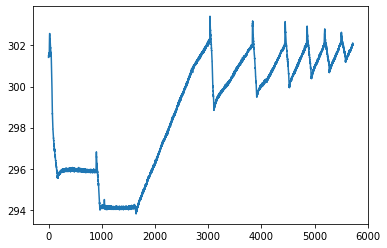

In [ ]:
plt.plot(ds_ammonia_prime['Time'],ds_ammonia_prime['I1(uA)'],label='ammonia')

In [ ]:
ds_ammonia_prime=ds_ammonia_prime.drop(range(0,6000),axis=0)
ds_ammonia_prime=ds_ammonia_prime.reset_index()
ds_ammonia_prime=ds_ammonia_prime.drop('index',axis=1)
ds_ammonia_prime.head()
ds_ammonia_prime['Time']=ds_ammonia_prime['Time']-2399

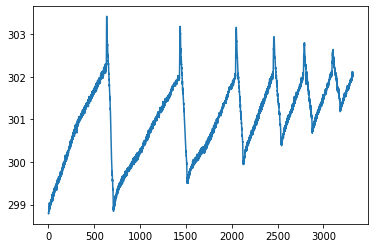

In [ ]:
plt.plot(ds_ammonia_prime['Time'],ds_ammonia_prime['I1(uA)'],label='ammonia')

In [ ]:
ds_ammonia_prime=ds_ammonia_prime.rename(columns={'I1(uA)':'response'})


In [ ]:
for i in range(0,ds_ammonia_prime['response'].size):
  if(ds_ammonia_prime.at[i,'response']>302.1):
    ds_ammonia_prime.at[i,'response']=302.1 


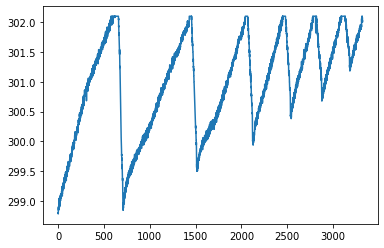

In [ ]:
plt.plot(ds_ammonia_prime['Time'],ds_ammonia_prime['response'],label='ammonia')

In [ ]:
am100_50_prime=ds_ammonia_prime

In [ ]:
am100_50_prime.to_csv('am100_50_prime.csv')

In [ ]:
#Ammonia 100
ds_am100=am100_50_prime[0:3575]
con_am100=np.ones(ds_am100['Time'].size)*100
sat_am100=np.zeros(ds_am100['Time'].size)
rec_am100=np.zeros(ds_am100['Time'].size)
class_am100=np.ones(ds_am100['Time'].size)*5
j=1625
for i in range(1625,1770):
  sat_am100[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[1625,'Time'])/(am100_50_prime.at[1770,'Time']-am100_50_prime.at[1625,'Time'])
  j+=1
for i in range(1770,3575):
  rec_am100[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[1770,'Time'])/(ds_am100['Time'].max()-am100_50_prime.at[1770,'Time'])
  j+=1
ds_am100.insert(loc=2,column='concentration',value=con_am100)
ds_am100.insert(loc=3,column='saturation',value=sat_am100)
ds_am100.insert(loc=4,column='recovery',value=rec_am100)
ds_am100.insert(loc=5,column='class',value=class_am100)

#Ammonia 90
ds_am90=am100_50_prime[3576:5107]
con_am90=np.ones(ds_am90['Time'].size)*90
sat_am90=np.zeros(ds_am90['Time'].size)
rec_am90=np.zeros(ds_am90['Time'].size)
class_am90=np.ones(ds_am90['Time'].size)*4
j=0
for i in range(3576,3787):
  sat_am90[j]=(am100_50_prime.at[i,'Time']-ds_am90['Time'].min())/(am100_50_prime.at[3787,'Time']-ds_am90['Time'].min())
  j+=1
for i in range(3788,5107):
  rec_am90[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[3788,'Time'])/(ds_am90['Time'].max()-am100_50_prime.at[3788,'Time'])
  j+=1
ds_am90.insert(loc=2,column='concentration',value=con_am90)
ds_am90.insert(loc=3,column='saturation',value=sat_am90)
ds_am90.insert(loc=4,column='recovery',value=rec_am90)
ds_am90.insert(loc=5,column='class',value=class_am90)

#Ammonia 80
ds_am80=am100_50_prime[5108:6131]
con_am80=np.ones(ds_am80['Time'].size)*80
sat_am80=np.zeros(ds_am80['Time'].size)
rec_am80=np.zeros(ds_am80['Time'].size)
class_am80=np.ones(ds_am80['Time'].size)*3
j=0
for i in range(5108,5319):
  sat_am80[j]=(am100_50_prime.at[i,'Time']-ds_am80['Time'].min())/(am100_50_prime.at[5319,'Time']-ds_am80['Time'].min())
  j+=1
for i in range(5320,6131):
  rec_am80[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[5120,'Time'])/(ds_am80['Time'].max()-am100_50_prime.at[5120,'Time'])
  j+=1
ds_am80.insert(loc=2,column='concentration',value=con_am80)
ds_am80.insert(loc=3,column='saturation',value=sat_am80)
ds_am80.insert(loc=4,column='recovery',value=rec_am80)
ds_am80.insert(loc=5,column='class',value=class_am80)

#Ammonia 70
ds_am70=am100_50_prime[6132:7000]
con_am70=np.ones(ds_am70['Time'].size)*70
sat_am70=np.zeros(ds_am70['Time'].size)
rec_am70=np.zeros(ds_am70['Time'].size)
class_am70=np.ones(ds_am70['Time'].size)*2
j=0
for i in range(6132,6334):
  sat_am70[j]=(am100_50_prime.at[i,'Time']-ds_am70['Time'].min())/(am100_50_prime.at[6334,'Time']-ds_am70['Time'].min())
  j+=1
for i in range(6334,7000):
  rec_am70[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[6334,'Time'])/(ds_am70['Time'].max()-am100_50_prime.at[6334,'Time'])
  j+=1
ds_am70.insert(loc=2,column='concentration',value=con_am70)
ds_am70.insert(loc=3,column='saturation',value=sat_am70)
ds_am70.insert(loc=4,column='recovery',value=rec_am70)
ds_am70.insert(loc=5,column='class',value=class_am70)

#Ammonia 60
ds_am60=am100_50_prime[7001:7720]
con_am60=np.ones(ds_am60['Time'].size)*60
sat_am60=np.zeros(ds_am60['Time'].size)
rec_am60=np.zeros(ds_am60['Time'].size)
class_am60=np.ones(ds_am60['Time'].size)*1
j=0
for i in range(7001,7195):
  sat_am60[j]=(am100_50_prime.at[i,'Time']-ds_am60['Time'].min())/(am100_50_prime.at[7195,'Time']-ds_am60['Time'].min())
  j+=1
for i in range(7195,7720):
  rec_am60[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[7195,'Time'])/(ds_am60['Time'].max()-am100_50_prime.at[7195,'Time'])
  j+=1
ds_am60.insert(loc=2,column='concentration',value=con_am60)
ds_am60.insert(loc=3,column='saturation',value=sat_am60)
ds_am60.insert(loc=4,column='recovery',value=rec_am60)
ds_am60.insert(loc=5,column='class',value=class_am60)

#Ammonia 50
ds_am50=am100_50_prime[7720:am100_50_prime['Time'].size]
con_am50=np.ones(ds_am50['Time'].size)*50
sat_am50=np.zeros(ds_am50['Time'].size)
rec_am50=np.zeros(ds_am50['Time'].size)
class_am50=np.ones(ds_am50['Time'].size)*0
j=0
for i in range(7720,7964):
  sat_am50[j]=(am100_50_prime.at[i,'Time']-ds_am50['Time'].min())/(am100_50_prime.at[7964,'Time']-ds_am50['Time'].min())
  j+=1
for i in range(7965,am100_50_prime['Time'].size):
  rec_am50[j]=(am100_50_prime.at[i,'Time']-am100_50_prime.at[7965,'Time'])/(ds_am50['Time'].max()-am100_50_prime.at[7965,'Time'])
  j+=1
ds_am50.insert(loc=2,column='concentration',value=con_am50)
ds_am50.insert(loc=3,column='saturation',value=sat_am50)
ds_am50.insert(loc=4,column='recovery',value=rec_am50)
ds_am50.insert(loc=5,column='class',value=class_am50)

In [ ]:
ds_am100

,Time,response,concentration,saturation,recovery,class
0,1.00188,298.80,100.0,0.0,0.000000,5.0
1,1.40188,298.80,100.0,0.0,0.000000,5.0
2,1.80188,298.78,100.0,0.0,0.000000,5.0
3,2.20188,298.84,100.0,0.0,0.000000,5.0
4,2.60188,298.78,100.0,0.0,0.000000,5.0
...,...,...,...,...,...,...
3570,1429.00188,301.96,100.0,0.0,0.997783,5.0
3571,1429.40188,301.96,100.0,0.0,0.998337,5.0
3572,1429.80188,302.00,100.0,0.0,0.998891,5.0
3573,1430.20188,301.96,100.0,0.0,0.999446,5.0


In [ ]:
ds_am90

,Time,response,concentration,saturation,recovery,class
3576,1431.40188,302.10,90.0,0.000000,0.000000,4.0
3577,1431.80188,302.10,90.0,0.004739,0.000000,4.0
3578,1432.20188,302.10,90.0,0.009479,0.000000,4.0
3579,1432.60188,302.10,90.0,0.014218,0.000000,4.0
3580,1433.00188,302.10,90.0,0.018957,0.000000,4.0
...,...,...,...,...,...,...
5102,2041.80188,302.02,90.0,0.000000,0.997724,4.0
5103,2042.20188,302.10,90.0,0.000000,0.998483,4.0
5104,2042.60188,302.10,90.0,0.000000,0.999241,4.0
5105,2043.00188,302.10,90.0,0.000000,1.000000,4.0


In [ ]:
ds_am80

,Time,response,concentration,saturation,recovery,class
5108,2044.20188,302.10,80.0,0.000000,0.00000,3.0
5109,2044.60188,302.10,80.0,0.004739,0.00000,3.0
5110,2045.00188,302.10,80.0,0.009479,0.00000,3.0
5111,2045.40188,302.10,80.0,0.014218,0.00000,3.0
5112,2045.80188,302.10,80.0,0.018957,0.00000,3.0
...,...,...,...,...,...,...
6126,2451.40188,302.10,80.0,0.000000,0.99703,3.0
6127,2451.80188,302.08,80.0,0.000000,0.99802,3.0
6128,2452.20188,302.08,80.0,0.000000,0.99901,3.0
6129,2452.60188,302.08,80.0,0.000000,1.00000,3.0


In [ ]:
ds_am70

,Time,response,concentration,saturation,recovery,class
6132,2453.80188,302.1,70.0,0.000000,0.000000,2.0
6133,2454.20188,302.1,70.0,0.004950,0.000000,2.0
6134,2454.60188,302.1,70.0,0.009901,0.000000,2.0
6135,2455.00188,302.1,70.0,0.014851,0.000000,2.0
6136,2455.40188,302.1,70.0,0.019802,0.000000,2.0
...,...,...,...,...,...,...
6995,2799.00188,302.1,70.0,0.000000,0.993985,2.0
6996,2799.40188,302.1,70.0,0.000000,0.995489,2.0
6997,2799.80188,302.1,70.0,0.000000,0.996992,2.0
6998,2800.20188,302.1,70.0,0.000000,0.998496,2.0


In [ ]:
ds_am60

,Time,response,concentration,saturation,recovery,class
7001,2801.40188,302.10,60.0,0.000000,0.000000,1.0
7002,2801.80188,302.10,60.0,0.005155,0.000000,1.0
7003,2802.20188,302.10,60.0,0.010309,0.000000,1.0
7004,2802.60188,302.10,60.0,0.015464,0.000000,1.0
7005,2803.00188,302.10,60.0,0.020619,0.000000,1.0
...,...,...,...,...,...,...
7715,3087.00188,302.04,60.0,0.000000,0.992366,1.0
7716,3087.40188,302.04,60.0,0.000000,0.994275,1.0
7717,3087.80190,302.06,60.0,0.000000,0.996183,1.0
7718,3088.20189,302.08,60.0,0.000000,0.998092,1.0


In [ ]:
ds_am50

,Time,response,concentration,saturation,recovery,class
7720,3089.00189,302.04,50.0,0.000000,0.000000,0.0
7721,3089.40188,302.04,50.0,0.004098,0.000000,0.0
7722,3089.80188,302.10,50.0,0.008197,0.000000,0.0
7723,3090.20188,302.10,50.0,0.012295,0.000000,0.0
7724,3090.60188,302.10,50.0,0.016393,0.000000,0.0
...,...,...,...,...,...,...
8299,3320.60188,302.04,50.0,0.000000,0.991124,0.0
8300,3321.00188,302.02,50.0,0.000000,0.994083,0.0
8301,3321.40188,302.00,50.0,0.000000,0.997041,0.0
8302,3321.80188,302.04,50.0,0.000000,1.000000,0.0


In [ ]:
am100_50_prime_new=ds_am50
am100_50_prime_new=am100_50_prime_new.append(ds_am60)
am100_50_prime_new=am100_50_prime_new.append(ds_am70)
am100_50_prime_new=am100_50_prime_new.append(ds_am80)
am100_50_prime_new=am100_50_prime_new.append(ds_am90)
am100_50_prime_new=am100_50_prime_new.append(ds_am100)

In [ ]:
am100_50_prime_new

,Time,response,concentration,saturation,recovery,class
7720,3089.00189,302.04,50.0,0.000000,0.000000,0.0
7721,3089.40188,302.04,50.0,0.004098,0.000000,0.0
7722,3089.80188,302.10,50.0,0.008197,0.000000,0.0
7723,3090.20188,302.10,50.0,0.012295,0.000000,0.0
7724,3090.60188,302.10,50.0,0.016393,0.000000,0.0
...,...,...,...,...,...,...
3570,1429.00188,301.96,100.0,0.000000,0.997783,5.0
3571,1429.40188,301.96,100.0,0.000000,0.998337,5.0
3572,1429.80188,302.00,100.0,0.000000,0.998891,5.0
3573,1430.20188,301.96,100.0,0.000000,0.999446,5.0


In [ ]:
am100_50_prime_new[['response']]=scaler.fit_transform(am100_50_prime_new[['response']])
am100_50_prime_new[['concentration']]=scaler.fit_transform(am100_50_prime_new[['concentration']])

In [ ]:

am100_50_prime_new=am100_50_prime_new.reset_index()
am100_50_prime_new=am100_50_prime_new.drop('index',axis=1)

In [ ]:
am100_50_prime_new

,Time,response,concentration,saturation,recovery,class
0,3089.00189,0.981928,0.0,0.000000,0.000000,0.0
1,3089.40188,0.981928,0.0,0.004098,0.000000,0.0
2,3089.80188,1.000000,0.0,0.008197,0.000000,0.0
3,3090.20188,1.000000,0.0,0.012295,0.000000,0.0
4,3090.60188,1.000000,0.0,0.016393,0.000000,0.0
...,...,...,...,...,...,...
8295,1429.00188,0.957831,1.0,0.000000,0.997783,5.0
8296,1429.40188,0.957831,1.0,0.000000,0.998337,5.0
8297,1429.80188,0.969880,1.0,0.000000,0.998891,5.0
8298,1430.20188,0.957831,1.0,0.000000,0.999446,5.0


###Toluene_75_ammonia_0_50

In [ ]:
to75am0_50_prime=pd.read_csv('tou75_am_20_35_50_new.csv')

In [ ]:
to75am0_50_prime.head()

,Time,I1
0,0.0082,961.98
1,0.4006,962.10
2,0.8005,962.12
3,1.2006,962.10
4,1.6006,962.08


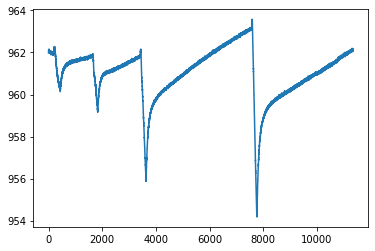

In [ ]:
plt.plot(to75am0_50_prime['Time'],to75am0_50_prime['I1'])

In [ ]:
to75am0_50_prime=to75am0_50_prime.rename(columns={'I1':'response'})

In [ ]:
# Toluene 75 Ammonia 0
ds_to75_am0=to75am0_50_prime[0:4102]
con_to75_am0=np.ones(4102)*75
class_to75_am0=np.ones(4102)*6
sat_to75_am0=np.zeros(4102)
rec_to75_am0=np.zeros(4102)
j=612
for i in range(612,1063):
  sat_to75_am0[j]=(to75am0_50_prime.at[i,'Time']-to75am0_50_prime.at[612,'Time'])/(to75am0_50_prime.at[1063,'Time']-to75am0_50_prime.at[612,'Time'])
  j+=1
for i in range(1063,4100):
  rec_to75_am0[j]=(to75am0_50_prime.at[i,'Time']-to75am0_50_prime.at[1063,'Time'])/(ds_to75_am0['Time'].max()-to75am0_50_prime.at[1063,'Time'])
  j+=1
ds_to75_am0.insert(loc=2,column='concentration',value=con_to75_am0)
ds_to75_am0.insert(loc=3,column='saturation',value=sat_to75_am0)
ds_to75_am0.insert(loc=4,column='recovery',value=rec_to75_am0)
ds_to75_am0.insert(loc=5,column='class',value=class_to75_am0)
#Toluene 75 Ammonia 20
ds_to75_am20=to75am0_50_prime[4103:8615]
con_to75_am20=np.ones(8615-4103)*95
class_to75_am20=np.ones(8615-4103)*6
sat_to75_am20=np.zeros(8615-4103)
rec_to75_am20=np.zeros(8615-4103)
j=0
for i in range(4103,4552):
  sat_to75_am20[j]=(to75am0_50_prime.at[i,'Time']-ds_to75_am20['Time'].min())/(to75am0_50_prime.at[4551,'Time']-ds_to75_am20['Time'].min())
  j+=1
for i in range(4553,8615):
  rec_to75_am20[j]=(to75am0_50_prime.at[i,'Time']-to75am0_50_prime.at[4553,'Time'])/(ds_to75_am20['Time'].max()-to75am0_50_prime.at[4553,'Time'])
  j+=1
ds_to75_am20.insert(loc=2,column='concentration',value=con_to75_am20)
ds_to75_am20.insert(loc=3,column='saturation',value=sat_to75_am20)
ds_to75_am20.insert(loc=4,column='recovery',value=rec_to75_am20)
ds_to75_am20.insert(loc=5,column='class',value=class_to75_am20)

#Toluene 75 Ammonia 35
ds_to75_am35=to75am0_50_prime[8616:18927]
con_to75_am35=np.ones(18927-8616)*110
class_to75_am35=np.ones(18927-8616)*6
sat_to75_am35=np.zeros(18927-8616)
rec_to75_am35=np.zeros(18927-8616)
j=0
for i in range(8616,9065):
  sat_to75_am35[j]=(to75am0_50_prime.at[i,'Time']-ds_to75_am35['Time'].min())/(to75am0_50_prime.at[9065,'Time']-ds_to75_am35['Time'].min())
  j+=1
for i in range(9066,18927):
  rec_to75_am35[j]=(to75am0_50_prime.at[i,'Time']-to75am0_50_prime.at[9066,'Time'])/(ds_to75_am35['Time'].max()-to75am0_50_prime.at[9066,'Time'])
  j+=1
ds_to75_am35.insert(loc=2,column='concentration',value=con_to75_am35)
ds_to75_am35.insert(loc=3,column='saturation',value=sat_to75_am35)
ds_to75_am35.insert(loc=4,column='recovery',value=rec_to75_am35)
ds_to75_am35.insert(loc=5,column='class',value=class_to75_am35)

#Toluene 75 Ammonia 50
ds_to75_am50=to75am0_50_prime[18928:to75am0_50_prime['Time'].size]
con_to75_am50=np.ones(ds_to75_am50['Time'].size)*125
class_to75_am50=np.ones(ds_to75_am50['Time'].size)*7
sat_to75_am50=np.zeros(ds_to75_am50['Time'].size)
rec_to75_am50=np.zeros(ds_to75_am50['Time'].size)
j=0
for i in range(18928,19377):
  sat_to75_am50[j]=(to75am0_50_prime.at[i,'Time']-ds_to75_am50['Time'].min())/(to75am0_50_prime.at[19377,'Time']-ds_to75_am50['Time'].min())
  j+=1
for i in range(19377,to75am0_50_prime['Time'].size):
  rec_to75_am50[j]=(to75am0_50_prime.at[i,'Time']-to75am0_50_prime.at[19377,'Time'])/(ds_to75_am50['Time'].max()-to75am0_50_prime.at[19377,'Time'])
  j+=1
ds_to75_am50.insert(loc=2,column='concentration',value=con_to75_am50)
ds_to75_am50.insert(loc=3,column='saturation',value=sat_to75_am50)
ds_to75_am50.insert(loc=4,column='recovery',value=rec_to75_am50)
ds_to75_am50.insert(loc=5,column='class',value=class_to75_am50)

#containing datasets -> ds_to75_am0, ds_to75_am20, ds_to75_am35, ds_to75_am50


In [ ]:
tou75am0_75_prime_new=ds_to75_am0
tou75am0_75_prime_new=tou75am0_75_prime_new.append(ds_to75_am20)
tou75am0_75_prime_new=tou75am0_75_prime_new.append(ds_to75_am35)
tou75am0_75_prime_new=tou75am0_75_prime_new.append(ds_to75_am50)


In [ ]:
tou75am0_75_prime_new=tou75am0_75_prime_new.rename(columns={'I1':'response'})

In [ ]:
tou75am0_75_prime_new[['response']]=scaler.fit_transform(tou75am0_75_prime_new[['response']])
tou75am0_75_prime_new[['concentration']]=scaler.fit_transform(tou75am0_75_prime_new[['concentration']])

In [ ]:
tou75am0_75_prime_new=tou75am0_75_prime_new.reset_index()
tou75am0_75_prime_new=tou75am0_75_prime_new.drop('index',axis=1)

###Toluene 65 Ammonia 0_50

In [ ]:
to65am0_50_prime=pd.read_csv('tou_65_am_20_35_50_new.csv')

In [ ]:
to65am0_50_prime

,Time,--
0,0.00819,220.99141
1,0.40060,220.98981
2,0.80050,220.98877
3,1.20060,220.98829
4,1.60059,220.98839
...,...,...
13108,5243.20059,221.28022
13109,5243.60059,221.29486
13110,5244.00059,221.31278
13111,5244.40059,221.33398


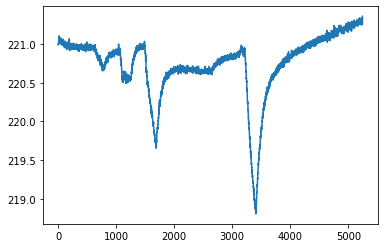

In [ ]:
plt.plot(to65am0_50_prime['Time'],to65am0_50_prime['--'])

In [ ]:
to65am0_50_prime=to65am0_50_prime.drop(range(11001,to65am0_50_prime['Time'].size))

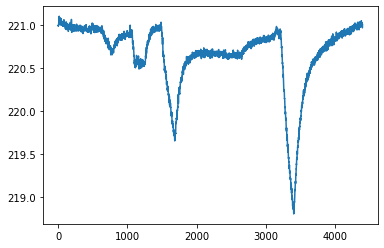

In [ ]:
plt.plot(to65am0_50_prime['Time'],to65am0_50_prime['--'])

In [ ]:
to65am0_50_prime=to65am0_50_prime.rename(columns={'--':'response'})

In [ ]:
#Toluene 65 Ammonia 0
ds_to65_am0=to65am0_50_prime[0:2650]
con_to65_am0=np.ones(ds_to65_am0['Time'].size)*65
sat_to65_am0=np.zeros(ds_to65_am0['Time'].size)
rec_to65_am0=np.zeros(ds_to65_am0['Time'].size)
class_to65_am0=np.ones(ds_to65_am0['Time'].size)*8
j=1477
for i in range(1477,1927):
  sat_to65_am0[j]=(to65am0_50_prime.at[i,'Time']-to65am0_50_prime.at[1477,'Time'])/(to65am0_50_prime.at[1926,'Time']-to65am0_50_prime.at[1477,'Time'])
  j+=1
for i in range(1928,2650):
  rec_to65_am0[j]=(to65am0_50_prime.at[i,'Time']-to65am0_50_prime.at[1928,'Time'])/(ds_to65_am0['Time'].max()-to65am0_50_prime.at[1928,'Time'])
  j+=1
ds_to65_am0.insert(loc=2,column='concentration',value=con_to65_am0)
ds_to65_am0.insert(loc=3,column='saturation',value=sat_to65_am0)
ds_to65_am0.insert(loc=4,column='recovery',value=rec_to65_am0)
ds_to65_am0.insert(loc=5,column='class',value=class_to65_am0)

#Toluene 65 Ammonia 20
ds_to65_am20=to65am0_50_prime[2651:3752]
con_to65_am20=np.ones(ds_to65_am20['Time'].size)*85
sat_to65_am20=np.zeros(ds_to65_am20['Time'].size)
rec_to65_am20=np.zeros(ds_to65_am20['Time'].size)
class_to65_am20=np.ones(ds_to65_am20['Time'].size)*8
j=0
for i in range(2651,3102):
  sat_to65_am20[j]=(to65am0_50_prime.at[i,'Time']-ds_to65_am20['Time'].min())/(to65am0_50_prime.at[3101,'Time']-ds_to65_am20['Time'].min())
  j+=1
for i in range(3102,3752):
  rec_to65_am20[j]=(to65am0_50_prime.at[i,'Time']-to65am0_50_prime.at[3102,'Time'])/(ds_to65_am20['Time'].max()-to65am0_50_prime.at[3102,'Time'])
  j+=1
ds_to65_am20.insert(loc=2,column='concentration',value=con_to65_am20)
ds_to65_am20.insert(loc=3,column='saturation',value=sat_to65_am20)
ds_to65_am20.insert(loc=4,column='recovery',value=rec_to65_am20)
ds_to65_am20.insert(loc=5,column='class',value=class_to65_am20)

#Toluene 65 Ammonia 35
ds_to65_am35=to65am0_50_prime[3753:8040]
con_to65_am35=np.ones(ds_to65_am35['Time'].size)*100
sat_to65_am35=np.zeros(ds_to65_am35['Time'].size)
rec_to65_am35=np.zeros(ds_to65_am35['Time'].size)
class_to65_am35=np.ones(ds_to65_am35['Time'].size)*9
j=0
for i in range(3753,4202):
  sat_to65_am35[j]=(to65am0_50_prime.at[i,'Time']-ds_to65_am35['Time'].min())/(to65am0_50_prime.at[4201,'Time']-ds_to65_am35['Time'].min())
  j+=1
for i in range(4203,8040):
  rec_to65_am35[j]=(to65am0_50_prime.at[i,'Time']-to65am0_50_prime.at[4203,'Time'])/(ds_to65_am35['Time'].max()-to65am0_50_prime.at[4203,'Time'])
  j+=1
ds_to65_am35.insert(loc=2,column='concentration',value=con_to65_am35)
ds_to65_am35.insert(loc=3,column='saturation',value=sat_to65_am35)
ds_to65_am35.insert(loc=4,column='recovery',value=rec_to65_am35)
ds_to65_am35.insert(loc=5,column='class',value=class_to65_am35)

#Toluene 65 Ammonia 50
ds_to65_am50=to65am0_50_prime[8040:to65am0_50_prime['Time'].size]
con_to65_am50=np.ones(ds_to65_am50['Time'].size)*115
sat_to65_am50=np.zeros(ds_to65_am50['Time'].size)
rec_to65_am50=np.zeros(ds_to65_am50['Time'].size)
class_to65_am50=np.ones(ds_to65_am50['Time'].size)*10
j=0
for i in range(8040,8490):
  sat_to65_am50[j]=(to65am0_50_prime.at[i,'Time']-ds_to65_am50['Time'].min())/(to65am0_50_prime.at[8489,'Time']-ds_to65_am50['Time'].min())
  j+=1
for i in range(8490,to65am0_50_prime['Time'].size):
  rec_to65_am50[j]=(to65am0_50_prime.at[i,'Time']-to65am0_50_prime.at[8490,'Time'])/(ds_to65_am50['Time'].max()-to65am0_50_prime.at[8490,'Time'])
  j+=1
ds_to65_am50.insert(loc=2,column='concentration',value=con_to65_am50)
ds_to65_am50.insert(loc=3,column='saturation',value=sat_to65_am50)
ds_to65_am50.insert(loc=4,column='recovery',value=rec_to65_am50)
ds_to65_am50.insert(loc=5,column='class',value=class_to65_am50)

In [ ]:
ds_to65_am0

,Time,response,concentration,saturation,recovery,class
0,0.00819,220.99141,65.0,0.0,0.000000,8.0
1,0.40060,220.98981,65.0,0.0,0.000000,8.0
2,0.80050,220.98877,65.0,0.0,0.000000,8.0
3,1.20060,220.98829,65.0,0.0,0.000000,8.0
4,1.60059,220.98839,65.0,0.0,0.000000,8.0
...,...,...,...,...,...,...
2645,1058.00059,220.92738,65.0,0.0,0.995839,8.0
2646,1058.40059,220.93915,65.0,0.0,0.997226,8.0
2647,1058.80059,220.93640,65.0,0.0,0.998613,8.0
2648,1059.20059,220.94282,65.0,0.0,1.000000,8.0


In [ ]:
ds_to65_am20

,Time,response,concentration,saturation,recovery,class
2651,1060.40059,220.92988,85.0,0.000000,0.000000,8.0
2652,1060.80060,220.92746,85.0,0.002222,0.000000,8.0
2653,1061.20059,220.90525,85.0,0.004444,0.000000,8.0
2654,1061.60059,220.88067,85.0,0.006667,0.000000,8.0
2655,1062.00059,220.86789,85.0,0.008889,0.000000,8.0
...,...,...,...,...,...,...
3747,1498.80059,220.91198,85.0,0.000000,0.993837,8.0
3748,1499.20059,220.91008,85.0,0.000000,0.995377,8.0
3749,1499.60059,220.90755,85.0,0.000000,0.996918,8.0
3750,1500.00059,220.91495,85.0,0.000000,0.998459,8.0


In [ ]:
ds_to65_am35

,Time,response,concentration,saturation,recovery,class
3753,1501.20059,220.89678,100.0,0.000000,0.000000,9.0
3754,1501.60059,220.89240,100.0,0.002232,0.000000,9.0
3755,1502.00059,220.87231,100.0,0.004464,0.000000,9.0
3756,1502.40060,220.87176,100.0,0.006696,0.000000,9.0
3757,1502.80059,220.87490,100.0,0.008929,0.000000,9.0
...,...,...,...,...,...,...
8035,3214.00059,220.92903,100.0,0.000000,0.999218,9.0
8036,3214.40060,220.91162,100.0,0.000000,0.999479,9.0
8037,3214.80059,220.92284,100.0,0.000000,0.999739,9.0
8038,3215.20059,220.93846,100.0,0.000000,1.000000,9.0


In [ ]:
ds_to65_am50

,Time,response,concentration,saturation,recovery,class
8040,3216.00059,220.93859,115.0,0.000000,0.000000,10.0
8041,3216.40059,220.92302,115.0,0.002227,0.000000,10.0
8042,3216.80059,220.91750,115.0,0.004454,0.000000,10.0
8043,3217.20059,220.92062,115.0,0.006682,0.000000,10.0
8044,3217.60059,220.92766,115.0,0.008909,0.000000,10.0
...,...,...,...,...,...,...
10996,4398.40059,220.97886,115.0,0.000000,0.998406,10.0
10997,4398.80059,220.97973,115.0,0.000000,0.998805,10.0
10998,4399.20059,221.00246,115.0,0.000000,0.999203,10.0
10999,4399.60060,220.99267,115.0,0.000000,0.999602,10.0


In [ ]:
tou65am0_50_prime_new=ds_to65_am0
tou65am0_50_prime_new=tou65am0_50_prime_new.append(ds_to65_am20)
tou65am0_50_prime_new=tou65am0_50_prime_new.append(ds_to65_am35)
tou65am0_50_prime_new=tou65am0_50_prime_new.append(ds_to65_am50)

In [ ]:
#tou65am0_50_prime_new.to_csv('tou65_am0_50_mod1.csv')

In [ ]:
tou65am0_50_prime_new[['response']]=scaler.fit_transform(tou65am0_50_prime_new[['response']])
tou65am0_50_prime_new[['concentration']]=scaler.fit_transform(tou65am0_50_prime_new[['concentration']])

In [ ]:
tou65am0_50_prime_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 11000
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           10999 non-null  float64
 1   response       10999 non-null  float64
 2   concentration  10999 non-null  float64
 3   saturation     10999 non-null  float64
 4   recovery       10999 non-null  float64
 5   class          10999 non-null  float64
dtypes: float64(6)
memory usage: 601.5 KB


In [ ]:
tou65am0_50_prime_new=tou65am0_50_prime_new.reset_index()
tou65am0_50_prime_new=tou65am0_50_prime_new.drop('index',axis=1)

###Acetone 75 Ammonia 0-35



In [ ]:
ace75am0_50_prime=pd.read_csv('ace_75_am_20_35_50_new.csv')

In [ ]:
ace75am0_50_prime.head()

,Time,I1
0,0.00820,227.76
1,0.40060,227.62
2,0.80050,227.76
3,1.20060,227.68
4,1.60059,227.68


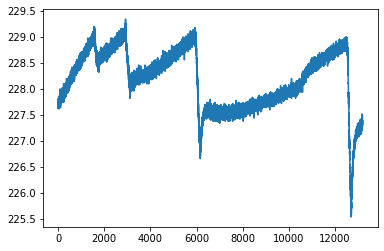

In [ ]:
plt.plot(ace75am0_50_prime['Time'],ace75am0_50_prime['I1'])

In [ ]:
ace75am0_50_prime=ace75am0_50_prime.drop(range(31250,ace75am0_50_prime['Time'].size))

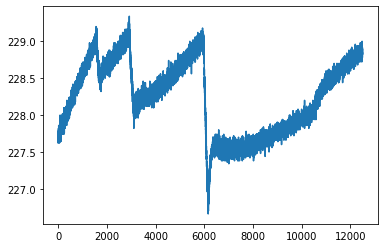

In [ ]:
plt.plot(ace75am0_50_prime['Time'],ace75am0_50_prime['I1'])

In [ ]:
#to be noted that this will only be acetone 75 ammonia 0
#acetone 75 ammonia 20
#acetone 75 ammonia 35

In [ ]:
#acetone 75 ammonia 0
ds_ace75_am0=ace75am0_50_prime[0:7302]
con_ace75_am0=np.ones(ds_ace75_am0['Time'].size)*75
sat_ace75_am0=np.zeros(ds_ace75_am0['Time'].size)
rec_ace75_am0=np.zeros(ds_ace75_am0['Time'].size)
class_ace75_am0=np.ones(ds_ace75_am0['Time'].size)*11
j=3872
for i in range(3872,4322):
  sat_ace75_am0[j]=(ace75am0_50_prime.at[i,'Time']-ace75am0_50_prime.at[3872,'Time'])/(ace75am0_50_prime.at[4322,'Time']-ace75am0_50_prime.at[3872,'Time'])
  j+=1
for i in range(4322,7302):
  rec_ace75_am0[j]=(ace75am0_50_prime.at[i,'Time']-ace75am0_50_prime.at[4322,'Time'])/(ds_ace75_am0['Time'].max()-ace75am0_50_prime.at[4322,'Time'])
  j+=1
ds_ace75_am0.insert(loc=2,column='concentration',value=con_ace75_am0)
ds_ace75_am0.insert(loc=3,column='saturation',value=sat_ace75_am0)
ds_ace75_am0.insert(loc=4,column='recovery',value=rec_ace75_am0)
ds_ace75_am0.insert(loc=5,column='class',value=class_ace75_am0)

#acetone 75 Ammonia 20
ds_ace75_am20=ace75am0_50_prime[7303:14927]
con_ace75_am20=np.ones(ds_ace75_am20['Time'].size)*95
sat_ace75_am20=np.zeros(ds_ace75_am20['Time'].size)
rec_ace75_am20=np.zeros(ds_ace75_am20['Time'].size)
class_ace75_am20=np.ones(ds_ace75_am20['Time'].size)*11
j=0
for i in range(7303,7752):
  sat_ace75_am20[j]=(ace75am0_50_prime.at[i,'Time']-ds_ace75_am20['Time'].min())/(ace75am0_50_prime.at[7752,'Time']-ds_ace75_am20['Time'].min())
  j+=1
for i in range(7753,14927):
  rec_ace75_am20[j]=(ace75am0_50_prime.at[i,'Time']-ace75am0_50_prime.at[7753,'Time'])/(ds_ace75_am20['Time'].max()-ace75am0_50_prime.at[7753,'Time'])
  j+=1
ds_ace75_am20.insert(loc=2,column='concentration',value=con_ace75_am20)
ds_ace75_am20.insert(loc=3,column='saturation',value=sat_ace75_am20)
ds_ace75_am20.insert(loc=4,column='recovery',value=rec_ace75_am20)
ds_ace75_am20.insert(loc=5,column='class',value=class_ace75_am20)

#acetone 75 ammonia 35
ds_ace75_am35=ace75am0_50_prime[14928:ace75am0_50_prime['Time'].size]
con_ace75_am35=np.ones(ds_ace75_am35['Time'].size)*110
sat_ace75_am35=np.zeros(ds_ace75_am35['Time'].size)
rec_ace75_am35=np.zeros(ds_ace75_am35['Time'].size)
class_ace75_am35=np.ones(ds_ace75_am35['Time'].size)*12
j=0
for i in range(14928,15377):
  sat_ace75_am35[j]=(ace75am0_50_prime.at[i,'Time']-ds_ace75_am35['Time'].min())/(ace75am0_50_prime.at[15377,'Time']-ds_ace75_am35['Time'].min())
  j+=1
for i in range(15378,ace75am0_50_prime['Time'].size):
  rec_ace75_am35[j]=(ace75am0_50_prime.at[i,'Time']-ace75am0_50_prime.at[15378,'Time'])/(ds_ace75_am35['Time'].max()-ace75am0_50_prime.at[15378,'Time'])
  j+=1
ds_ace75_am35.insert(loc=2,column='concentration',value=con_ace75_am35)
ds_ace75_am35.insert(loc=3,column='saturation',value=sat_ace75_am35)
ds_ace75_am35.insert(loc=4,column='recovery',value=rec_ace75_am35)
ds_ace75_am35.insert(loc=5,column='class',value=class_ace75_am35)

In [ ]:
ds_ace75_am0

,Time,I1,concentration,saturation,recovery,class
0,0.00820,227.76,75.0,0.0,0.000000,11.0
1,0.40060,227.62,75.0,0.0,0.000000,11.0
2,0.80050,227.76,75.0,0.0,0.000000,11.0
3,1.20060,227.68,75.0,0.0,0.000000,11.0
4,1.60059,227.68,75.0,0.0,0.000000,11.0
...,...,...,...,...,...,...
7297,2918.80059,229.18,75.0,0.0,0.998657,11.0
7298,2919.20059,229.04,75.0,0.0,0.998993,11.0
7299,2919.60061,229.24,75.0,0.0,0.999329,11.0
7300,2920.00060,229.20,75.0,0.0,0.999664,11.0


In [ ]:
ds_ace75_am20

,Time,I1,concentration,saturation,recovery,class
7303,2921.20059,229.34,95.0,0.000000,0.000000,11.0
7304,2921.60059,229.18,95.0,0.002227,0.000000,11.0
7305,2922.00059,229.18,95.0,0.004454,0.000000,11.0
7306,2922.40059,229.24,95.0,0.006682,0.000000,11.0
7307,2922.80059,229.10,95.0,0.008909,0.000000,11.0
...,...,...,...,...,...,...
14922,5968.80059,229.02,95.0,0.000000,0.999582,11.0
14923,5969.20060,229.04,95.0,0.000000,0.999721,11.0
14924,5969.60059,228.96,95.0,0.000000,0.999861,11.0
14925,5970.00059,229.02,95.0,0.000000,1.000000,11.0


In [ ]:
ds_ace75_am35

,Time,I1,concentration,saturation,recovery,class
14928,5971.20059,228.98,110.0,0.000000,0.000000,12.0
14929,5971.60060,228.94,110.0,0.002227,0.000000,12.0
14930,5972.00059,229.08,110.0,0.004454,0.000000,12.0
14931,5972.40059,229.00,110.0,0.006682,0.000000,12.0
14932,5972.80059,228.96,110.0,0.008909,0.000000,12.0
...,...,...,...,...,...,...
31245,12498.00059,228.84,110.0,0.000000,0.999811,12.0
31246,12498.40059,228.90,110.0,0.000000,0.999874,12.0
31247,12498.80059,228.88,110.0,0.000000,0.999937,12.0
31248,12499.20059,228.82,110.0,0.000000,1.000000,12.0


In [ ]:
ace75am0_50_prime_new=ds_ace75_am0
ace75am0_50_prime_new=ace75am0_50_prime_new.append(ds_ace75_am20)
ace75am0_50_prime_new=ace75am0_50_prime_new.append(ds_ace75_am35)

In [ ]:
ace75am0_50_prime_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31248 entries, 0 to 31249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           31248 non-null  float64
 1   I1             31248 non-null  float64
 2   concentration  31248 non-null  float64
 3   saturation     31248 non-null  float64
 4   recovery       31248 non-null  float64
 5   class          31248 non-null  float64
dtypes: float64(6)
memory usage: 1.7 MB


In [ ]:
ace75am0_50_prime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31250 entries, 0 to 31249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31250 non-null  float64
 1   I1      31250 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB


In [ ]:

ace75am0_50_prime_new=ace75am0_50_prime_new.rename(columns={'I1':'response'})

In [ ]:
ace75am0_50_prime_new[['response']]=scaler.fit_transform(ace75am0_50_prime_new[['response']])
ace75am0_50_prime_new[['concentration']]=scaler.fit_transform(ace75am0_50_prime_new[['concentration']])

In [ ]:
ace75am0_50_prime_new=ace75am0_50_prime_new.reset_index()
ace75am0_50_prime_new=ace75am0_50_prime_new.drop('index',axis=1)

###Acetone 65 Ammonia 0-50

In [ ]:
ace65am0_50_prime=pd.read_csv('ace_65_am_20_35_50_new.csv')

In [ ]:
ace65am0_50_prime.head()

,Time,I1
0,0.00820,219.62941
1,0.40060,219.64124
2,0.80050,219.65384
3,1.20060,219.66724
4,1.60059,219.68142


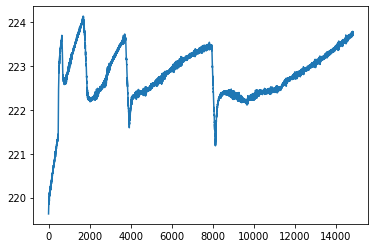

In [ ]:
plt.plot(ace65am0_50_prime['Time'],ace65am0_50_prime['I1'])

In [ ]:
#Acetone 65 Ammonia 0
ds_ace65_am0=ace65am0_50_prime[0:4240]
con_ace65_am0=np.ones(ds_ace65_am0['Time'].size)*65
sat_ace65_am0=np.zeros(ds_ace65_am0['Time'].size)
rec_ace65_am0=np.zeros(ds_ace65_am0['Time'].size)
class_ace65_am0=np.ones(ds_ace65_am0['Time'].size)*13
j=1607
for i in range(1607,2057):
  sat_ace65_am0[j]=(ace65am0_50_prime.at[i,'Time']-ace65am0_50_prime.at[1607,'Time'])/(ace65am0_50_prime.at[2057,'Time']-ace65am0_50_prime.at[1607,'Time'])
  j+=1
for i in range(2058,4240):
  rec_ace65_am0[j]=(ace65am0_50_prime.at[i,'Time']-ace65am0_50_prime.at[2058,'Time'])/(ds_ace65_am0['Time'].max()-ace65am0_50_prime.at[2058,'Time'])
  j+=1
ds_ace65_am0.insert(loc=2,column='concentration',value=con_ace65_am0)
ds_ace65_am0.insert(loc=3,column='saturation',value=sat_ace65_am0)
ds_ace65_am0.insert(loc=4,column='recovery',value=rec_ace65_am0)
ds_ace65_am0.insert(loc=5,column='class',value=class_ace65_am0)

#Acetone 65 Ammonia 20
ds_ace65_am20=ace65am0_50_prime[4241:9365]
con_ace65_am20=np.ones(ds_ace65_am20['Time'].size)*85
sat_ace65_am20=np.zeros(ds_ace65_am20['Time'].size)
rec_ace65_am20=np.zeros(ds_ace65_am20['Time'].size)
class_ace65_am20=np.ones(ds_ace65_am20['Time'].size)*13
j=0
for i in range(4241,4690):
  sat_ace65_am20[j]=(ace65am0_50_prime.at[i,'Time']-ds_ace65_am20['Time'].min())/(ace65am0_50_prime.at[4690,'Time']-ds_ace65_am20['Time'].min())
  j+=1
for i in range(4691,9365):
  rec_ace65_am20[j]=(ace65am0_50_prime.at[i,'Time']-ace65am0_50_prime.at[4691,'Time'])/(ds_ace65_am20['Time'].max()-ace65am0_50_prime.at[4691,'Time'])
  j+=1
ds_ace65_am20.insert(loc=2,column='concentration',value=con_ace65_am20)
ds_ace65_am20.insert(loc=3,column='saturation',value=sat_ace65_am20)
ds_ace65_am20.insert(loc=4,column='recovery',value=rec_ace65_am20)
ds_ace65_am20.insert(loc=5,column='class',value=class_ace65_am20)

#Acetone 65 Ammonia 35
ds_ace65_am35=ace65am0_50_prime[9366:19852]
con_ace65_am35=np.ones(ds_ace65_am35['Time'].size)*100
sat_ace65_am35=np.zeros(ds_ace65_am35['Time'].size)
rec_ace65_am35=np.zeros(ds_ace65_am35['Time'].size)
class_ace65_am35=np.ones(ds_ace65_am35['Time'].size)*13
j=0
for i in range(9366,9815):
  sat_ace65_am35[j]=(ace65am0_50_prime.at[i,'Time']-ds_ace65_am35['Time'].min())/(ace65am0_50_prime.at[9815,'Time']-ds_ace65_am35['Time'].min())
  j+=1
for i in range(9816,19852):
  rec_ace65_am35[j]=(ace65am0_50_prime.at[i,'Time']-ace65am0_50_prime.at[9816,'Time'])/(ds_ace65_am35['Time'].max()-ace65am0_50_prime.at[9816,'Time'])
  j+=1
ds_ace65_am35.insert(loc=2,column='concentration',value=con_ace65_am35)
ds_ace65_am35.insert(loc=3,column='saturation',value=sat_ace65_am35)
ds_ace65_am35.insert(loc=4,column='recovery',value=rec_ace65_am35)
ds_ace65_am35.insert(loc=5,column='class',value=class_ace65_am35)

#Acetone 65 Ammonia 50
ds_ace65_am50=ace65am0_50_prime[19853:ace65am0_50_prime['Time'].size]
con_ace65_am50=np.ones(ds_ace65_am50['Time'].size)*115
sat_ace65_am50=np.zeros(ds_ace65_am50['Time'].size)
rec_ace65_am50=np.zeros(ds_ace65_am50['Time'].size)
class_ace65_am50=np.ones(ds_ace65_am50['Time'].size)*14
j=0
for i in range(19853,20302):
  sat_ace65_am50[j]=(ace65am0_50_prime.at[i,'Time']-ds_ace65_am50['Time'].min())/(ace65am0_50_prime.at[20302,'Time']-ds_ace65_am50['Time'].min())
  j+=1
for i in range(20303,ace65am0_50_prime['Time'].size):
  rec_ace65_am50[j]=(ace65am0_50_prime.at[i,'Time']-ace65am0_50_prime.at[20303,'Time'])/(ds_ace65_am50['Time'].max()-ace65am0_50_prime.at[20303,'Time'])
  j+=1
ds_ace65_am50.insert(loc=2,column='concentration',value=con_ace65_am50)
ds_ace65_am50.insert(loc=3,column='saturation',value=sat_ace65_am50)
ds_ace65_am50.insert(loc=4,column='recovery',value=rec_ace65_am50)
ds_ace65_am50.insert(loc=5,column='class',value=class_ace65_am50)


In [ ]:
ds_ace65_am0

,Time,I1,concentration,saturation,recovery,class
0,0.00820,219.62941,65.0,0.0,0.000000,13.0
1,0.40060,219.64124,65.0,0.0,0.000000,13.0
2,0.80050,219.65384,65.0,0.0,0.000000,13.0
3,1.20060,219.66724,65.0,0.0,0.000000,13.0
4,1.60059,219.68142,65.0,0.0,0.000000,13.0
...,...,...,...,...,...,...
4235,1694.00059,224.11292,65.0,0.0,0.998624,13.0
4236,1694.40059,224.10195,65.0,0.0,0.999083,13.0
4237,1694.80060,224.08744,65.0,0.0,0.999542,13.0
4238,1695.20060,224.08170,65.0,0.0,1.000000,13.0


In [ ]:
ds_ace65_am20

,Time,I1,concentration,saturation,recovery,class
4241,1696.40059,224.12961,85.0,0.000000,0.000000,13.0
4242,1696.80059,224.12433,85.0,0.002227,0.000000,13.0
4243,1697.20059,224.11687,85.0,0.004454,0.000000,13.0
4244,1697.60059,224.09951,85.0,0.006682,0.000000,13.0
4245,1698.00059,224.09996,85.0,0.008909,0.000000,13.0
...,...,...,...,...,...,...
9360,3744.00060,223.62525,85.0,0.000000,0.999358,13.0
9361,3744.40060,223.62271,85.0,0.000000,0.999572,13.0
9362,3744.80059,223.61672,85.0,0.000000,0.999786,13.0
9363,3745.20059,223.59805,85.0,0.000000,1.000000,13.0


In [ ]:
ds_ace65_am35

,Time,I1,concentration,saturation,recovery,class
9366,3746.40059,223.57613,100.0,0.000000,0.000000,13.0
9367,3746.80059,223.59052,100.0,0.002227,0.000000,13.0
9368,3747.20059,223.58995,100.0,0.004454,0.000000,13.0
9369,3747.60059,223.58950,100.0,0.006682,0.000000,13.0
9370,3748.00059,223.60154,100.0,0.008909,0.000000,13.0
...,...,...,...,...,...,...
19847,7938.80059,223.38022,100.0,0.000000,0.999701,13.0
19848,7939.20059,223.37790,100.0,0.000000,0.999801,13.0
19849,7939.60059,223.39652,100.0,0.000000,0.999900,13.0
19850,7940.00059,223.40127,100.0,0.000000,1.000000,13.0


In [ ]:
ds_ace65_am50

,Time,I1,concentration,saturation,recovery,class
19853,7941.20059,223.37238,115.0,0.000000,0.000000,14.0
19854,7941.60059,223.36328,115.0,0.002227,0.000000,14.0
19855,7942.00059,223.37296,115.0,0.004454,0.000000,14.0
19856,7942.40059,223.38889,115.0,0.006682,0.000000,14.0
19857,7942.80059,223.40139,115.0,0.008909,0.000000,14.0
...,...,...,...,...,...,...
37059,14823.60059,223.74302,115.0,0.000000,0.999821,14.0
37060,14824.00060,223.74695,115.0,0.000000,0.999881,14.0
37061,14824.40060,223.75145,115.0,0.000000,0.999940,14.0
37062,14824.80059,223.75653,115.0,0.000000,1.000000,14.0


In [ ]:
ace65am0_50_prime_new=ds_ace65_am0
ace65am0_50_prime_new=ace65am0_50_prime_new.append(ds_ace65_am20)
ace65am0_50_prime_new=ace65am0_50_prime_new.append(ds_ace65_am35)
ace65am0_50_prime_new=ace65am0_50_prime_new.append(ds_ace65_am50)

In [ ]:
ace65am0_50_prime_new

,Time,I1,concentration,saturation,recovery,class
0,0.00820,219.62941,65.0,0.0,0.000000,13.0
1,0.40060,219.64124,65.0,0.0,0.000000,13.0
2,0.80050,219.65384,65.0,0.0,0.000000,13.0
3,1.20060,219.66724,65.0,0.0,0.000000,13.0
4,1.60059,219.68142,65.0,0.0,0.000000,13.0
...,...,...,...,...,...,...
37059,14823.60059,223.74302,115.0,0.0,0.999821,14.0
37060,14824.00060,223.74695,115.0,0.0,0.999881,14.0
37061,14824.40060,223.75145,115.0,0.0,0.999940,14.0
37062,14824.80059,223.75653,115.0,0.0,1.000000,14.0


In [ ]:
ace65am0_50_prime_new=ace65am0_50_prime_new.rename(columns={'I1':'response'})

In [ ]:
ace65am0_50_prime_new[['response']]=scaler.fit_transform(ace65am0_50_prime_new[['response']])
ace65am0_50_prime_new[['concentration']]=scaler.fit_transform(ace65am0_50_prime_new[['concentration']])


In [ ]:
ace65am0_50_prime_new=ace65am0_50_prime_new.reset_index()
ace65am0_50_prime_new=ace65am0_50_prime_new.drop('index',axis=1)

### formaldehyde 75 ammonia 0-50

In [ ]:
for75am0_50_prime=pd.read_csv('for_75_am_20_35_50.csv')

In [ ]:
for75am0_50_prime

,Time,I1
0,0.00820,497.00
1,0.40060,496.96
2,0.80050,496.96
3,1.20059,496.96
4,1.60059,497.00
...,...,...
19271,7708.40059,496.90
19272,7708.80059,496.90
19273,7709.20059,496.88
19274,7709.60059,496.90


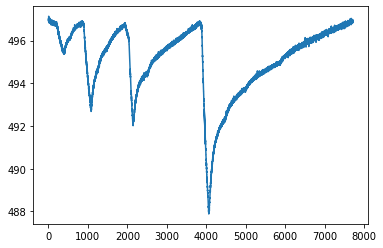

In [ ]:
plt.plot(for75am0_50_prime['Time'],for75am0_50_prime['I1'])

In [ ]:
#formaldehyde 75 ammonia 0
ds_for75_am0=for75am0_50_prime[0:2227]
con_for75_am0=np.ones(ds_for75_am0['Time'].size)*75
sat_for75_am0=np.zeros(ds_for75_am0['Time'].size)
rec_for75_am0=np.zeros(ds_for75_am0['Time'].size)
class_for75_am0=np.ones(ds_for75_am0['Time'].size)*15
j=515
for i in range(515,965):
  sat_for75_am0[j]=(for75am0_50_prime.at[i,'Time']-for75am0_50_prime.at[515,'Time'])/(for75am0_50_prime.at[965,'Time']-for75am0_50_prime.at[515,'Time'])
  j+=1
for i in range(966,2227):
  rec_for75_am0[j]=(for75am0_50_prime.at[i,'Time']-for75am0_50_prime.at[966,'Time'])/(ds_for75_am0['Time'].max()-for75am0_50_prime.at[966,'Time'])
  j+=1
ds_for75_am0.insert(loc=2,column='concentration',value=con_for75_am0)
ds_for75_am0.insert(loc=3,column='saturation',value=sat_for75_am0)
ds_for75_am0.insert(loc=4,column='recovery',value=rec_for75_am0)
ds_for75_am0.insert(loc=5,column='class',value=class_for75_am0)

#formaldehyde 75 ammonia 20
ds_for75_am20=for75am0_50_prime[2228:4877]
con_for75_am20=np.ones(ds_for75_am20['Time'].size)*95
sat_for75_am20=np.zeros(ds_for75_am20['Time'].size)
rec_for75_am20=np.zeros(ds_for75_am20['Time'].size)
class_for75_am20=np.ones(ds_for75_am20['Time'].size)*15
j=0
for i in range(2228,2677):
  sat_for75_am20[j]=(for75am0_50_prime.at[i,'Time']-ds_for75_am20['Time'].min())/(for75am0_50_prime.at[2677,'Time']-ds_for75_am20['Time'].min())
  j+=1
for i in range(2678,4877):
  rec_for75_am20[j]=(for75am0_50_prime.at[i,'Time']-for75am0_50_prime.at[2678,'Time'])/(ds_for75_am20['Time'].max()-for75am0_50_prime.at[2678,'Time'])
  j+=1
ds_for75_am20.insert(loc=2,column='concentration',value=con_for75_am20)
ds_for75_am20.insert(loc=3,column='saturation',value=sat_for75_am20)
ds_for75_am20.insert(loc=4,column='recovery',value=rec_for75_am20)
ds_for75_am20.insert(loc=5,column='class',value=class_for75_am20)

#formaldehyde 75 ammonia 35 
ds_for75_am35=for75am0_50_prime[4878:9690]
con_for75_am35=np.ones(ds_for75_am35['Time'].size)*110
sat_for75_am35=np.zeros(ds_for75_am35['Time'].size)
rec_for75_am35=np.zeros(ds_for75_am35['Time'].size)
class_for75_am35=np.ones(ds_for75_am35['Time'].size)*15
j=0
for i in range(4878,5327):
  sat_for75_am35[j]=(for75am0_50_prime.at[i,'Time']-ds_for75_am35['Time'].min())/(for75am0_50_prime.at[5327,'Time']-ds_for75_am35['Time'].min())
  j+=1
for i in range(5328,9690):
  rec_for75_am35[j]=(for75am0_50_prime.at[i,'Time']-for75am0_50_prime.at[5328,'Time'])/(ds_for75_am35['Time'].max()-for75am0_50_prime.at[5328,'Time'])
  j+=1
ds_for75_am35.insert(loc=2,column='concentration',value=con_for75_am35)
ds_for75_am35.insert(loc=3,column='saturation',value=sat_for75_am35)
ds_for75_am35.insert(loc=4,column='recovery',value=rec_for75_am35)
ds_for75_am35.insert(loc=5,column='class',value=class_for75_am35)

#formaldehyde 75 ammonia 50
ds_for75_am50=for75am0_50_prime[9691:for75am0_50_prime['Time'].size]
con_for75_am50=np.ones(ds_for75_am50['Time'].size)*125
sat_for75_am50=np.zeros(ds_for75_am50['Time'].size)
rec_for75_am50=np.zeros(ds_for75_am50['Time'].size)
class_for75_am50=np.ones(ds_for75_am50['Time'].size)*16
j=0
for i in range(9691,10140):
  sat_for75_am50[j]=(for75am0_50_prime.at[i,'Time']-ds_for75_am50['Time'].min())/(for75am0_50_prime.at[10140,'Time']-ds_for75_am50['Time'].min())
  j+=1
for i in range(10140,for75am0_50_prime['Time'].size):
  rec_for75_am50[j]=(for75am0_50_prime.at[i,'Time']-for75am0_50_prime.at[10140,'Time'])/(ds_for75_am50['Time'].max()-for75am0_50_prime.at[10140,'Time'])
  j+=1
ds_for75_am50.insert(loc=2,column='concentration',value=con_for75_am50)
ds_for75_am50.insert(loc=3,column='saturation',value=sat_for75_am50)
ds_for75_am50.insert(loc=4,column='recovery',value=rec_for75_am50)
ds_for75_am50.insert(loc=5,column='class',value=class_for75_am50)

In [ ]:
ds_for75_am0

,Time,I1,concentration,saturation,recovery,class
0,0.00820,497.00,75.0,0.0,0.000000,15.0
1,0.40060,496.96,75.0,0.0,0.000000,15.0
2,0.80050,496.96,75.0,0.0,0.000000,15.0
3,1.20059,496.96,75.0,0.0,0.000000,15.0
4,1.60059,497.00,75.0,0.0,0.000000,15.0
...,...,...,...,...,...,...
2222,888.80059,496.82,75.0,0.0,0.997619,15.0
2223,889.20059,496.80,75.0,0.0,0.998413,15.0
2224,889.60059,496.82,75.0,0.0,0.999206,15.0
2225,890.00059,496.78,75.0,0.0,1.000000,15.0


In [ ]:
ds_for75_am20

,Time,I1,concentration,saturation,recovery,class
2228,891.20059,496.74,95.0,0.000000,0.000000,15.0
2229,891.60059,496.70,95.0,0.002227,0.000000,15.0
2230,892.00059,496.72,95.0,0.004454,0.000000,15.0
2231,892.40059,496.76,95.0,0.006682,0.000000,15.0
2232,892.80059,496.78,95.0,0.008909,0.000000,15.0
...,...,...,...,...,...,...
4872,1948.80059,496.72,95.0,0.000000,0.998635,15.0
4873,1949.20059,496.78,95.0,0.000000,0.999090,15.0
4874,1949.60059,496.72,95.0,0.000000,0.999545,15.0
4875,1950.00059,496.70,95.0,0.000000,1.000000,15.0


In [ ]:
ds_for75_am35

,Time,I1,concentration,saturation,recovery,class
4878,1951.20059,496.74,110.0,0.000000,0.000000,15.0
4879,1951.60060,496.72,110.0,0.002227,0.000000,15.0
4880,1952.00059,496.72,110.0,0.004454,0.000000,15.0
4881,1952.40059,496.72,110.0,0.006682,0.000000,15.0
4882,1952.80059,496.72,110.0,0.008909,0.000000,15.0
...,...,...,...,...,...,...
9685,3874.00060,496.70,110.0,0.000000,0.999312,15.0
9686,3874.40059,496.64,110.0,0.000000,0.999541,15.0
9687,3874.80060,496.64,110.0,0.000000,0.999771,15.0
9688,3875.20059,496.66,110.0,0.000000,1.000000,15.0


In [ ]:
ds_for75_am50

,Time,I1,concentration,saturation,recovery,class
9691,3876.40059,496.62,125.0,0.000000,0.000000,16.0
9692,3876.80059,496.68,125.0,0.002227,0.000000,16.0
9693,3877.20059,496.64,125.0,0.004454,0.000000,16.0
9694,3877.60059,496.68,125.0,0.006682,0.000000,16.0
9695,3878.00060,496.64,125.0,0.008909,0.000000,16.0
...,...,...,...,...,...,...
19271,7708.40059,496.90,125.0,0.000000,0.999562,16.0
19272,7708.80059,496.90,125.0,0.000000,0.999672,16.0
19273,7709.20059,496.88,125.0,0.000000,0.999781,16.0
19274,7709.60059,496.90,125.0,0.000000,0.999891,16.0


In [ ]:
for75am0_50_prime_new=ds_for75_am0
for75am0_50_prime_new=for75am0_50_prime_new.append(ds_for75_am20)
for75am0_50_prime_new=for75am0_50_prime_new.append(ds_for75_am35)
for75am0_50_prime_new=for75am0_50_prime_new.append(ds_for75_am50)

In [ ]:
for75am0_50_prime_new=for75am0_50_prime_new.rename(columns={'I1':'response'})

In [ ]:
for75am0_50_prime_new[['response']]=scaler.fit_transform(for75am0_50_prime_new[['response']])
for75am0_50_prime_new[['concentration']]=scaler.fit_transform(for75am0_50_prime_new[['concentration']])

In [ ]:
for75am0_50_prime_new=for75am0_50_prime_new.reset_index()
for75am0_50_prime_new=for75am0_50_prime_new.drop('index',axis=1)

###Formaldehyde 65 Ammonia 0 -35

In [ ]:
for65am0_35_prime=pd.read_csv('for_65_am_0_20_35.csv')

In [ ]:
for65am0_35_prime

,Time,I1
0,0.00820,521.50
1,0.40060,521.46
2,0.80060,521.54
3,1.20059,521.56
4,1.60060,521.56
...,...,...
41139,16455.60059,522.16
41140,16456.00059,522.14
41141,16456.40059,522.16
41142,16456.80059,522.10


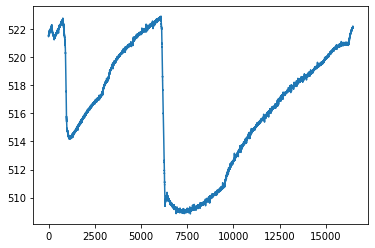

In [ ]:
plt.plot(for65am0_35_prime['Time'],for65am0_35_prime['I1'])

In [ ]:
#formaldehyde 65 ammonia 0
ds_for65_am0=for65am0_35_prime[0:1940]
con_for65_am0=np.ones(ds_for65_am0['Time'].size)*65
sat_for65_am0=np.zeros(ds_for65_am0['Time'].size)
rec_for65_am0=np.zeros(ds_for65_am0['Time'].size)
class_for65_am0=np.ones(ds_for65_am0['Time'].size)*17
j=390
for i in range(390,840):
  sat_for65_am0[j]=(for65am0_35_prime.at[i,'Time']-for65am0_35_prime.at[390,'Time'])/(for65am0_35_prime.at[840,'Time']-for65am0_35_prime.at[390,'Time'])
  j+=1
for i in range(841,1940):
  rec_for65_am0[j]=(for65am0_35_prime.at[i,'Time']-for65am0_35_prime.at[841,'Time'])/(ds_for65_am0['Time'].max()-for65am0_35_prime.at[841,'Time'])
  j+=1
ds_for65_am0.insert(loc=2,column='concentration',value=con_for65_am0)
ds_for65_am0.insert(loc=3,column='saturation',value=sat_for65_am0)
ds_for65_am0.insert(loc=4,column='recovery',value=rec_for65_am0)
ds_for65_am0.insert(loc=5,column='class',value=class_for65_am0)

#formaldehyde 65 ammonia 20
ds_for65_am20=for65am0_35_prime[1941:15277]
con_for65_am20=np.ones(ds_for65_am20['Time'].size)*85
sat_for65_am20=np.zeros(ds_for65_am20['Time'].size)
rec_for65_am20=np.zeros(ds_for65_am20['Time'].size)
class_for65_am20=np.ones(ds_for65_am20['Time'].size)*17
j=0
for i in range(1941,2390):
  sat_for65_am20[j]=(for65am0_35_prime.at[i,'Time']-ds_for65_am20['Time'].min())/(for65am0_35_prime.at[2390,'Time']-ds_for65_am20['Time'].min())
  j+=1
for i in range(2390,15277):
  rec_for65_am20[j]=(for65am0_35_prime.at[i,'Time']-for65am0_35_prime.at[2390,'Time'])/(ds_for65_am20['Time'].max()-for65am0_35_prime.at[2390,'Time'])
  j+=1
ds_for65_am20.insert(loc=2,column='concentration',value=con_for65_am20)
ds_for65_am20.insert(loc=3,column='saturation',value=sat_for65_am20)
ds_for65_am20.insert(loc=4,column='recovery',value=rec_for65_am20)
ds_for65_am20.insert(loc=5,column='class',value=class_for65_am20)

#formaldehyde 65 ammonia 35
ds_for65_am35=for65am0_35_prime[15278:for65am0_35_prime['Time'].size]
con_for65_am35=np.ones(ds_for65_am35['Time'].size)*100
sat_for65_am35=np.zeros(ds_for65_am35['Time'].size)
rec_for65_am35=np.zeros(ds_for65_am35['Time'].size)
class_for65_am35=np.ones(ds_for65_am35['Time'].size)*18
j=0
for i in range(15278,15727):
  sat_for65_am35[j]=(for65am0_35_prime.at[i,'Time']-ds_for65_am35['Time'].min())/(for65am0_35_prime.at[15727,'Time']-ds_for65_am35['Time'].min())
  j+=1
for i in range(15728,for65am0_35_prime['Time'].size):
  rec_for65_am35[j]=(for65am0_35_prime.at[i,'Time']-for65am0_35_prime.at[15728,'Time'])/(ds_for65_am35['Time'].max()-for65am0_35_prime.at[15728,'Time'])
  j+=1
ds_for65_am35.insert(loc=2,column='concentration',value=con_for65_am35)
ds_for65_am35.insert(loc=3,column='saturation',value=sat_for65_am35)
ds_for65_am35.insert(loc=4,column='recovery',value=rec_for65_am35)
ds_for65_am35.insert(loc=5,column='class',value=class_for65_am35)

In [ ]:
ds_for65_am0

,Time,I1,concentration,saturation,recovery,class
0,0.00820,521.50,65.0,0.0,0.000000,17.0
1,0.40060,521.46,65.0,0.0,0.000000,17.0
2,0.80060,521.54,65.0,0.0,0.000000,17.0
3,1.20059,521.56,65.0,0.0,0.000000,17.0
4,1.60060,521.56,65.0,0.0,0.000000,17.0
...,...,...,...,...,...,...
1935,774.00059,522.76,65.0,0.0,0.997268,17.0
1936,774.40059,522.74,65.0,0.0,0.998179,17.0
1937,774.80059,522.72,65.0,0.0,0.999089,17.0
1938,775.20059,522.76,65.0,0.0,1.000000,17.0


In [ ]:
ds_for65_am20

,Time,I1,concentration,saturation,recovery,class
1941,776.40059,522.70,85.0,0.000000,0.000000,17.0
1942,776.80059,522.68,85.0,0.002227,0.000000,17.0
1943,777.20059,522.72,85.0,0.004454,0.000000,17.0
1944,777.60059,522.70,85.0,0.006682,0.000000,17.0
1945,778.00059,522.66,85.0,0.008909,0.000000,17.0
...,...,...,...,...,...,...
15272,6108.80059,522.10,85.0,0.000000,0.999690,17.0
15273,6109.20059,522.14,85.0,0.000000,0.999767,17.0
15274,6109.60059,522.08,85.0,0.000000,0.999845,17.0
15275,6110.00059,522.04,85.0,0.000000,0.999922,17.0


In [ ]:
ds_for65_am35

,Time,I1,concentration,saturation,recovery,class
15278,6111.20059,522.08,100.0,0.000000,0.000000,18.0
15279,6111.60060,522.06,100.0,0.002227,0.000000,18.0
15280,6112.00060,522.10,100.0,0.004454,0.000000,18.0
15281,6112.40059,522.10,100.0,0.006682,0.000000,18.0
15282,6112.80059,522.06,100.0,0.008909,0.000000,18.0
...,...,...,...,...,...,...
41139,16455.60059,522.16,100.0,0.000000,0.999882,18.0
41140,16456.00059,522.14,100.0,0.000000,0.999921,18.0
41141,16456.40059,522.16,100.0,0.000000,0.999961,18.0
41142,16456.80059,522.10,100.0,0.000000,1.000000,18.0


In [ ]:
for65am0_35_prime_new=ds_for65_am0
for65am0_35_prime_new=for65am0_35_prime_new.append(ds_for65_am20)
for65am0_35_prime_new=for65am0_35_prime_new.append(ds_for65_am35)

In [ ]:
for65am0_35_prime_new

,Time,I1,concentration,saturation,recovery,class
0,0.00820,521.50,65.0,0.0,0.000000,17.0
1,0.40060,521.46,65.0,0.0,0.000000,17.0
2,0.80060,521.54,65.0,0.0,0.000000,17.0
3,1.20059,521.56,65.0,0.0,0.000000,17.0
4,1.60060,521.56,65.0,0.0,0.000000,17.0
...,...,...,...,...,...,...
41139,16455.60059,522.16,100.0,0.0,0.999882,18.0
41140,16456.00059,522.14,100.0,0.0,0.999921,18.0
41141,16456.40059,522.16,100.0,0.0,0.999961,18.0
41142,16456.80059,522.10,100.0,0.0,1.000000,18.0


In [ ]:
for65am0_35_prime_new=for65am0_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
for65am0_35_prime_new[['response']]=scaler.fit_transform(for65am0_35_prime_new[['response']])
for65am0_35_prime_new[['concentration']]=scaler.fit_transform(for65am0_35_prime_new[['concentration']])

In [ ]:
for65am0_35_prime_new=for65am0_35_prime_new.reset_index()
for65am0_35_prime_new=for65am0_35_prime_new.drop('index',axis=1)

###Toluene 65-75 Acetone 20 Ammonia 20-35

In [ ]:
tou75_65ace20am20_35_prime=pd.read_csv('tou_75_65_am_20_35_ac_20.csv')

In [ ]:
tou75_65ace20am20_35_prime

,Time,I1
0,0.00820,230.89264
1,0.40060,230.88913
2,0.80050,230.88621
3,1.20059,230.88386
4,1.60059,230.88209
...,...,...
10112,4044.80059,231.34258
10113,4045.20059,231.34687
10114,4045.60059,231.35126
10115,4046.00059,231.35575


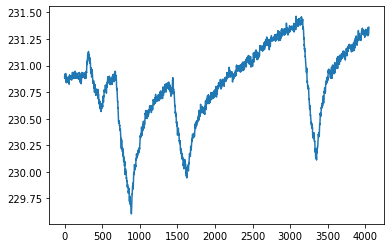

In [ ]:
plt.plot(tou75_65ace20am20_35_prime['Time'],tou75_65ace20am20_35_prime['I1'])

In [ ]:
#Toluene 75 Acetone 20 Ammonia 20
ds_tou75_ace20_am20=tou75_65ace20am20_35_prime[0:1727]
con_tou75_ace20_am20=np.ones(ds_tou75_ace20_am20['Time'].size)*115
sat_tou75_ace20_am20=np.zeros(ds_tou75_ace20_am20['Time'].size)
rec_tou75_ace20_am20=np.zeros(ds_tou75_ace20_am20['Time'].size)
class_tou75_ace20_am20=np.ones(ds_tou75_ace20_am20['Time'].size)*19
j=752
for i in range(752,1202):
  sat_tou75_ace20_am20[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-tou75_65ace20am20_35_prime.at[752,'Time'])/(tou75_65ace20am20_35_prime.at[1202,'Time']-tou75_65ace20am20_35_prime.at[752,'Time'])
  j+=1
for i in range(1203,1727):
  rec_tou75_ace20_am20[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-tou75_65ace20am20_35_prime.at[1203,'Time'])/(ds_tou75_ace20_am20['Time'].max()-tou75_65ace20am20_35_prime.at[1203,'Time'])
  j+=1
ds_tou75_ace20_am20.insert(loc=2,column='concentration',value=con_tou75_ace20_am20)
ds_tou75_ace20_am20.insert(loc=3,column='saturation',value=sat_tou75_ace20_am20)
ds_tou75_ace20_am20.insert(loc=4,column='recovery',value=rec_tou75_ace20_am20)
ds_tou75_ace20_am20.insert(loc=5,column='class',value=class_tou75_ace20_am20)

#Toluene 75 Acetone 20 Ammonia 35
ds_tou75_ace20_am35=tou75_65ace20am20_35_prime[1728:3590]
con_tou75_ace20_am35=np.ones(ds_tou75_ace20_am35['Time'].size)*130
sat_tou75_ace20_am35=np.zeros(ds_tou75_ace20_am35['Time'].size)
rec_tou75_ace20_am35=np.zeros(ds_tou75_ace20_am35['Time'].size)
class_tou75_ace20_am35=np.ones(ds_tou75_ace20_am35['Time'].size)*20
j=0
for i in range(1728,2177):
  sat_tou75_ace20_am35[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-ds_tou75_ace20_am35['Time'].min())/(tou75_65ace20am20_35_prime.at[2177,'Time']-ds_tou75_ace20_am35['Time'].min())
  j+=1
for i in range(2178,3590):
  rec_tou75_ace20_am35[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-tou75_65ace20am20_35_prime.at[2178,'Time'])/(ds_tou75_ace20_am35['Time'].max()-tou75_65ace20am20_35_prime.at[2178,'Time'])
  j+=1
ds_tou75_ace20_am35.insert(loc=2,column='concentration',value=con_tou75_ace20_am35)
ds_tou75_ace20_am35.insert(loc=3,column='saturation',value=sat_tou75_ace20_am35)
ds_tou75_ace20_am35.insert(loc=4,column='recovery',value=rec_tou75_ace20_am35)
ds_tou75_ace20_am35.insert(loc=5,column='class',value=class_tou75_ace20_am35)

#Toluene 65 Acetone 20 Ammonia 20
ds_tou65_ace20_am20=tou75_65ace20am20_35_prime[3591:7877]
con_tou65_ace20_am20=np.ones(ds_tou65_ace20_am20['Time'].size)*105
sat_tou65_ace20_am20=np.zeros(ds_tou65_ace20_am20['Time'].size)
rec_tou65_ace20_am20=np.zeros(ds_tou65_ace20_am20['Time'].size)
class_tou65_ace20_am20=np.ones(ds_tou65_ace20_am20['Time'].size)*21
j=0
for i in range(3591,4040):
  sat_tou65_ace20_am20[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-ds_tou65_ace20_am20['Time'].min())/(tou75_65ace20am20_35_prime.at[4040,'Time']-ds_tou65_ace20_am20['Time'].min())
  j+=1
for i in range(4041,7877):
  rec_tou65_ace20_am20[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-tou75_65ace20am20_35_prime.at[4041,'Time'])/(ds_tou65_ace20_am20['Time'].max()-tou75_65ace20am20_35_prime.at[4041,'Time'])
  j+=1
ds_tou65_ace20_am20.insert(loc=2,column='concentration',value=con_tou65_ace20_am20)
ds_tou65_ace20_am20.insert(loc=3,column='saturation',value=sat_tou65_ace20_am20)
ds_tou65_ace20_am20.insert(loc=4,column='recovery',value=rec_tou65_ace20_am20)
ds_tou65_ace20_am20.insert(loc=5,column='class',value=class_tou65_ace20_am20)

#Toluene 65 Acetone 20 Ammonia 35
ds_tou65_ace20_am35=tou75_65ace20am20_35_prime[7878:tou75_65ace20am20_35_prime['Time'].size]
con_tou65_ace20_am35=np.ones(ds_tou65_ace20_am35['Time'].size)*120
sat_tou65_ace20_am35=np.zeros(ds_tou65_ace20_am35['Time'].size)
rec_tou65_ace20_am35=np.zeros(ds_tou65_ace20_am35['Time'].size)
class_tou65_ace20_am35=np.ones(ds_tou65_ace20_am35['Time'].size)*22
j=0
for i in range(7878,8327):
  sat_tou65_ace20_am35[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-ds_tou65_ace20_am35['Time'].min())/(tou75_65ace20am20_35_prime.at[8327,'Time']-ds_tou65_ace20_am35['Time'].min())
  j+=1
for i in range(8327,tou75_65ace20am20_35_prime['Time'].size):
  rec_tou65_ace20_am35[j]=(tou75_65ace20am20_35_prime.at[i,'Time']-tou75_65ace20am20_35_prime.at[8327,'Time'])/(ds_tou65_ace20_am35['Time'].max()-tou75_65ace20am20_35_prime.at[8327,'Time'])
  j+=1
ds_tou65_ace20_am35.insert(loc=2,column='concentration',value=con_tou65_ace20_am35)
ds_tou65_ace20_am35.insert(loc=3,column='saturation',value=sat_tou65_ace20_am35)
ds_tou65_ace20_am35.insert(loc=4,column='recovery',value=rec_tou65_ace20_am35)
ds_tou65_ace20_am35.insert(loc=5,column='class',value=class_tou65_ace20_am35)



In [ ]:
ds_tou75_ace20_am20

,Time,I1,concentration,saturation,recovery,class
0,0.00820,230.89264,115.0,0.0,0.000000,19.0
1,0.40060,230.88913,115.0,0.0,0.000000,19.0
2,0.80050,230.88621,115.0,0.0,0.000000,19.0
3,1.20059,230.88386,115.0,0.0,0.000000,19.0
4,1.60059,230.88209,115.0,0.0,0.000000,19.0
...,...,...,...,...,...,...
1722,688.80060,230.86728,115.0,0.0,0.994264,19.0
1723,689.20060,230.86177,115.0,0.0,0.996176,19.0
1724,689.60059,230.85702,115.0,0.0,0.998088,19.0
1725,690.00059,230.84084,115.0,0.0,1.000000,19.0


In [ ]:
ds_tou75_ace20_am35

,Time,I1,concentration,saturation,recovery,class
1728,691.20059,230.81013,130.0,0.000000,0.000000,20.0
1729,691.60059,230.79939,130.0,0.002227,0.000000,20.0
1730,692.00059,230.79083,130.0,0.004454,0.000000,20.0
1731,692.40059,230.78734,130.0,0.006682,0.000000,20.0
1732,692.80059,230.78398,130.0,0.008909,0.000000,20.0
...,...,...,...,...,...,...
3585,1434.00060,230.84245,130.0,0.000000,0.997874,20.0
3586,1434.40059,230.84817,130.0,0.000000,0.998583,20.0
3587,1434.80059,230.84916,130.0,0.000000,0.999291,20.0
3588,1435.20059,230.86064,130.0,0.000000,1.000000,20.0


In [ ]:
ds_tou65_ace20_am20

,Time,I1,concentration,saturation,recovery,class
3591,1436.40059,230.86520,105.0,0.000000,0.000000,21.0
3592,1436.80059,230.86141,105.0,0.002227,0.000000,21.0
3593,1437.20059,230.86122,105.0,0.004454,0.000000,21.0
3594,1437.60059,230.86669,105.0,0.006682,0.000000,21.0
3595,1438.00059,230.86730,105.0,0.008909,0.000000,21.0
...,...,...,...,...,...,...
7872,3148.80060,231.45060,105.0,0.000000,0.999218,21.0
7873,3149.20059,231.45361,105.0,0.000000,0.999478,21.0
7874,3149.60059,231.45902,105.0,0.000000,0.999739,21.0
7875,3150.00059,231.45483,105.0,0.000000,1.000000,21.0


In [ ]:
ds_tou65_ace20_am35

,Time,I1,concentration,saturation,recovery,class
7878,3151.20059,231.44087,120.0,0.000000,0.000000,22.0
7879,3151.60059,231.43551,120.0,0.002227,0.000000,22.0
7880,3152.00059,231.43125,120.0,0.004454,0.000000,22.0
7881,3152.40059,231.42879,120.0,0.006682,0.000000,22.0
7882,3152.80059,231.41714,120.0,0.008909,0.000000,22.0
...,...,...,...,...,...,...
10112,4044.80059,231.34258,120.0,0.000000,0.997764,22.0
10113,4045.20059,231.34687,120.0,0.000000,0.998323,22.0
10114,4045.60059,231.35126,120.0,0.000000,0.998882,22.0
10115,4046.00059,231.35575,120.0,0.000000,0.999441,22.0


In [ ]:
tou75_65ace20am20_35_prime_new=ds_tou75_ace20_am20
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.append(ds_tou75_ace20_am35)
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.append(ds_tou65_ace20_am20)
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.append(ds_tou65_ace20_am35)

In [ ]:
tou75_65ace20am20_35_prime_new

,Time,I1,concentration,saturation,recovery,class
0,0.00820,230.89264,115.0,0.0,0.000000,19.0
1,0.40060,230.88913,115.0,0.0,0.000000,19.0
2,0.80050,230.88621,115.0,0.0,0.000000,19.0
3,1.20059,230.88386,115.0,0.0,0.000000,19.0
4,1.60059,230.88209,115.0,0.0,0.000000,19.0
...,...,...,...,...,...,...
10112,4044.80059,231.34258,120.0,0.0,0.997764,22.0
10113,4045.20059,231.34687,120.0,0.0,0.998323,22.0
10114,4045.60059,231.35126,120.0,0.0,0.998882,22.0
10115,4046.00059,231.35575,120.0,0.0,0.999441,22.0


In [ ]:
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
tou75_65ace20am20_35_prime_new

,Time,response,concentration,saturation,recovery,class
0,0.00820,230.89264,115.0,0.0,0.000000,19.0
1,0.40060,230.88913,115.0,0.0,0.000000,19.0
2,0.80050,230.88621,115.0,0.0,0.000000,19.0
3,1.20059,230.88386,115.0,0.0,0.000000,19.0
4,1.60059,230.88209,115.0,0.0,0.000000,19.0
...,...,...,...,...,...,...
10112,4044.80059,231.34258,120.0,0.0,0.997764,22.0
10113,4045.20059,231.34687,120.0,0.0,0.998323,22.0
10114,4045.60059,231.35126,120.0,0.0,0.998882,22.0
10115,4046.00059,231.35575,120.0,0.0,0.999441,22.0


In [ ]:
tou75_65ace20am20_35_prime_new[['response']]=scaler.fit_transform(tou75_65ace20am20_35_prime_new[['response']])
tou75_65ace20am20_35_prime_new[['concentration']]=scaler.fit_transform(tou75_65ace20am20_35_prime_new[['concentration']])

In [ ]:
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.reset_index()
tou75_65ace20am20_35_prime_new=tou75_65ace20am20_35_prime_new.drop('index',axis=1)

### Toluene 20 Acetone 75 Ammonia 20-35

In [ ]:
tou20ace75am20_35_prime=pd.read_csv('tou_20_am_20_35_ace_75.csv')

In [ ]:
tou20ace75am20_35_prime

,Time,I1
0,0.00820,548.38
1,0.40060,548.48
2,0.80050,548.48
3,1.20060,548.44
4,1.60059,548.40
...,...,...
18345,7338.00059,547.56
18346,7338.40059,547.60
18347,7338.80059,547.52
18348,7339.20059,547.56


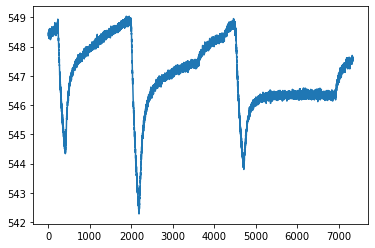

In [ ]:
plt.plot(tou20ace75am20_35_prime['Time'],tou20ace75am20_35_prime['I1'])

In [ ]:
tou20ace75am20_35_prime=tou20ace75am20_35_prime.drop(range(11291,tou20ace75am20_35_prime['Time'].size))

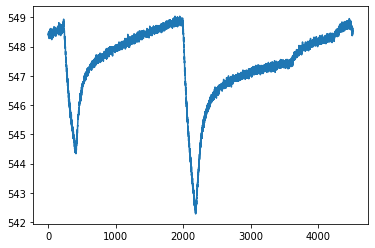

In [ ]:
plt.plot(tou20ace75am20_35_prime['Time'],tou20ace75am20_35_prime['I1'])

In [ ]:
#Toluene 20 Acetone 75 Ammonia 20
ds_tou20_ace75_am20=tou20ace75am20_35_prime[0:5002]
con_tou20_ace75_am20=np.ones(ds_tou20_ace75_am20['Time'].size)*115
sat_tou20_ace75_am20=np.zeros(ds_tou20_ace75_am20['Time'].size)
rec_tou20_ace75_am20=np.zeros(ds_tou20_ace75_am20['Time'].size)
class_tou20_ace75_am20=np.ones(ds_tou20_ace75_am20['Time'].size)*23
j=552
for i in range(552,1002):
  sat_tou20_ace75_am20[j]=(tou20ace75am20_35_prime.at[i,'Time']-tou20ace75am20_35_prime.at[552,'Time'])/(tou20ace75am20_35_prime.at[1002,'Time']-tou20ace75am20_35_prime.at[552,'Time'])
  j+=1
for i in range(1002,5002):
  rec_tou20_ace75_am20[j]=(tou20ace75am20_35_prime.at[i,'Time']-tou20ace75am20_35_prime.at[1002,'Time'])/(ds_tou20_ace75_am20['Time'].max()-tou20ace75am20_35_prime.at[1002,'Time'])
  j+=1
ds_tou20_ace75_am20.insert(loc=2,column='concentration',value=con_tou20_ace75_am20)
ds_tou20_ace75_am20.insert(loc=3,column='saturation',value=sat_tou20_ace75_am20)
ds_tou20_ace75_am20.insert(loc=4,column='recovery',value=rec_tou20_ace75_am20)
ds_tou20_ace75_am20.insert(loc=5,column='class',value=class_tou20_ace75_am20)

#Toluene 20 Acetone 75 Ammonia 35
ds_tou20_ace75_am35=tou20ace75am20_35_prime[5003:tou20ace75am20_35_prime['Time'].size]
con_tou20_ace75_am35=np.ones(ds_tou20_ace75_am35['Time'].size)*130
sat_tou20_ace75_am35=np.zeros(ds_tou20_ace75_am35['Time'].size)
rec_tou20_ace75_am35=np.zeros(ds_tou20_ace75_am35['Time'].size)
class_tou20_ace75_am35=np.ones(ds_tou20_ace75_am35['Time'].size)*24
j=0
for i in range(5003,5452):
  sat_tou20_ace75_am35[j]=(tou20ace75am20_35_prime.at[i,'Time']-ds_tou20_ace75_am35['Time'].min())/(tou20ace75am20_35_prime.at[5452,'Time']-ds_tou20_ace75_am35['Time'].min())
  j+=1
for i in range(5453,tou20ace75am20_35_prime['Time'].size):
  rec_tou20_ace75_am35[j]=(tou20ace75am20_35_prime.at[i,'Time']-tou20ace75am20_35_prime.at[5453,'Time'])/(ds_tou20_ace75_am35['Time'].max()-tou20ace75am20_35_prime.at[5453,'Time'])
  j+=1
ds_tou20_ace75_am35.insert(loc=2,column='concentration',value=con_tou20_ace75_am35)
ds_tou20_ace75_am35.insert(loc=3,column='saturation',value=sat_tou20_ace75_am35)
ds_tou20_ace75_am35.insert(loc=4,column='recovery',value=rec_tou20_ace75_am35)
ds_tou20_ace75_am35.insert(loc=5,column='class',value=class_tou20_ace75_am35)



In [ ]:
ds_tou20_ace75_am20

,Time,I1,concentration,saturation,recovery,class
0,0.00820,548.38,115.0,0.0,0.00000,23.0
1,0.40060,548.48,115.0,0.0,0.00000,23.0
2,0.80050,548.48,115.0,0.0,0.00000,23.0
3,1.20060,548.44,115.0,0.0,0.00000,23.0
4,1.60059,548.40,115.0,0.0,0.00000,23.0
...,...,...,...,...,...,...
4997,1998.80059,548.60,115.0,0.0,0.99900,23.0
4998,1999.20059,548.64,115.0,0.0,0.99925,23.0
4999,1999.60059,548.70,115.0,0.0,0.99950,23.0
5000,2000.00059,548.52,115.0,0.0,0.99975,23.0


In [ ]:
ds_tou20_ace75_am35

,Time,I1,concentration,saturation,recovery,class
5003,2001.20059,548.60,130.0,0.000000,0.000000,24.0
5004,2001.60059,548.46,130.0,0.002227,0.000000,24.0
5005,2002.00059,548.42,130.0,0.004454,0.000000,24.0
5006,2002.40059,548.46,130.0,0.006682,0.000000,24.0
5007,2002.80059,548.42,130.0,0.008909,0.000000,24.0
...,...,...,...,...,...,...
11286,4514.40059,548.64,130.0,0.000000,0.999486,24.0
11287,4514.80060,548.56,130.0,0.000000,0.999657,24.0
11288,4515.20060,548.52,130.0,0.000000,0.999829,24.0
11289,4515.60059,548.60,130.0,0.000000,1.000000,24.0


In [ ]:
tou20ace75am20_35_prime_new=ds_tou20_ace75_am20
tou20ace75am20_35_prime_new=tou20ace75am20_35_prime_new.append(ds_tou20_ace75_am35)

In [ ]:
tou20ace75am20_35_prime_new

,Time,I1,concentration,saturation,recovery,class
0,0.00820,548.38,115.0,0.0,0.000000,23.0
1,0.40060,548.48,115.0,0.0,0.000000,23.0
2,0.80050,548.48,115.0,0.0,0.000000,23.0
3,1.20060,548.44,115.0,0.0,0.000000,23.0
4,1.60059,548.40,115.0,0.0,0.000000,23.0
...,...,...,...,...,...,...
11286,4514.40059,548.64,130.0,0.0,0.999486,24.0
11287,4514.80060,548.56,130.0,0.0,0.999657,24.0
11288,4515.20060,548.52,130.0,0.0,0.999829,24.0
11289,4515.60059,548.60,130.0,0.0,1.000000,24.0


In [ ]:
tou20ace75am20_35_prime_new=tou20ace75am20_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
tou20ace75am20_35_prime_new[['response']]=scaler.fit_transform(tou20ace75am20_35_prime_new[['response']])
tou20ace75am20_35_prime_new[['concentration']]=scaler.fit_transform(tou20ace75am20_35_prime_new[['concentration']])

In [ ]:
tou20ace75am20_35_prime_new

,Time,response,concentration,saturation,recovery,class
0,0.00820,0.902367,0.0,0.0,0.000000,23.0
1,0.40060,0.917160,0.0,0.0,0.000000,23.0
2,0.80050,0.917160,0.0,0.0,0.000000,23.0
3,1.20060,0.911243,0.0,0.0,0.000000,23.0
4,1.60059,0.905325,0.0,0.0,0.000000,23.0
...,...,...,...,...,...,...
11286,4514.40059,0.940828,1.0,0.0,0.999486,24.0
11287,4514.80060,0.928994,1.0,0.0,0.999657,24.0
11288,4515.20060,0.923077,1.0,0.0,0.999829,24.0
11289,4515.60059,0.934911,1.0,0.0,1.000000,24.0


In [ ]:
tou20ace75am20_35_prime_new=tou20ace75am20_35_prime_new.reset_index()
tou20ace75am20_35_prime_new=tou20ace75am20_35_prime_new.drop('index',axis=1)

### Formaldehyde 65 Acetone 25 Ammonia 25-35

In [ ]:
for65ace20am25_35_prime=pd.read_csv('for_65_am_25_35_ace_25.csv')

In [ ]:
for65ace20am25_35_prime

,Time,I1
0,0.00820,518.58
1,0.40060,518.58
2,0.80050,518.60
3,1.20059,518.64
4,1.60059,518.58
...,...,...
42954,17180.00059,519.12
42955,17180.40059,519.14
42956,17180.80059,519.10
42957,17181.20059,519.10


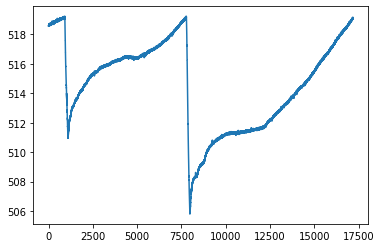

In [ ]:
plt.plot(for65ace20am25_35_prime['Time'],for65ace20am25_35_prime['I1'])

In [ ]:
#Formaldehyde 65 Acetone 25 Ammonia 25
ds_for65_ace20_am25=for65ace20am25_35_prime[0:19465]
con_for65_ace20_am25=np.ones(ds_for65_ace20_am25['Time'].size)*110
sat_for65_ace20_am25=np.zeros(ds_for65_ace20_am25['Time'].size)
rec_for65_ace20_am25=np.zeros(ds_for65_ace20_am25['Time'].size)
class_for65_ace20_am25=np.ones(ds_for65_ace20_am25['Time'].size)*25
j=2290
for i in range(2290,2740):
  sat_for65_ace20_am25[j]=(for65ace20am25_35_prime.at[i,'Time']-for65ace20am25_35_prime.at[2290,'Time'])/(for65ace20am25_35_prime.at[2740,'Time']-for65ace20am25_35_prime.at[2290,'Time'])
  j+=1
for i in range(2741,19465):
  rec_for65_ace20_am25[j]=(for65ace20am25_35_prime.at[i,'Time']-for65ace20am25_35_prime.at[2741,'Time'])/(ds_for65_ace20_am25['Time'].max()-for65ace20am25_35_prime.at[2741,'Time'])
  j+=1
ds_for65_ace20_am25.insert(loc=2,column='concentration',value=con_for65_ace20_am25)
ds_for65_ace20_am25.insert(loc=3,column='saturation',value=sat_for65_ace20_am25)
ds_for65_ace20_am25.insert(loc=4,column='recovery',value=rec_for65_ace20_am25)
ds_for65_ace20_am25.insert(loc=5,column='class',value=class_for65_ace20_am25)

#Formaldehyde 65 Acetone 25 Ammonia 35
ds_for65_ace20_am35=for65ace20am25_35_prime[19466:for65ace20am25_35_prime['Time'].size]
con_for65_ace20_am35=np.ones(ds_for65_ace20_am35['Time'].size)*120
sat_for65_ace20_am35=np.zeros(ds_for65_ace20_am35['Time'].size)
rec_for65_ace20_am35=np.zeros(ds_for65_ace20_am35['Time'].size)
class_for65_ace20_am35=np.ones(ds_for65_ace20_am35['Time'].size)*26
j=0
for i in range(19466,19915):
  sat_for65_ace20_am35[j]=(for65ace20am25_35_prime.at[i,'Time']-ds_for65_ace20_am35['Time'].min())/(for65ace20am25_35_prime.at[19915,'Time']-ds_for65_ace20_am35['Time'].min())
  j+=1
for i in range(19916,for65ace20am25_35_prime['Time'].size):
  rec_for65_ace20_am35[j]=(for65ace20am25_35_prime.at[i,'Time']-for65ace20am25_35_prime.at[19916,'Time'])/(ds_for65_ace20_am35['Time'].max()-for65ace20am25_35_prime.at[19916,'Time'])
  j+=1
ds_for65_ace20_am35.insert(loc=2,column='concentration',value=con_for65_ace20_am35)
ds_for65_ace20_am35.insert(loc=3,column='saturation',value=sat_for65_ace20_am35)
ds_for65_ace20_am35.insert(loc=4,column='recovery',value=rec_for65_ace20_am35)
ds_for65_ace20_am35.insert(loc=5,column='class',value=class_for65_ace20_am35)

In [ ]:
ds_for65_ace20_am25

,Time,I1,concentration,saturation,recovery,class
0,0.00820,518.58,110.0,0.0,0.000000,25.0
1,0.40060,518.58,110.0,0.0,0.000000,25.0
2,0.80050,518.60,110.0,0.0,0.000000,25.0
3,1.20059,518.64,110.0,0.0,0.000000,25.0
4,1.60059,518.58,110.0,0.0,0.000000,25.0
...,...,...,...,...,...,...
19460,7784.00059,519.14,110.0,0.0,0.999821,25.0
19461,7784.40059,519.12,110.0,0.0,0.999880,25.0
19462,7784.80059,519.12,110.0,0.0,0.999940,25.0
19463,7785.20059,519.10,110.0,0.0,1.000000,25.0


In [ ]:
ds_for65_ace20_am35

,Time,I1,concentration,saturation,recovery,class
19466,7786.40059,519.12,120.0,0.000000,0.000000,26.0
19467,7786.80059,519.08,120.0,0.002227,0.000000,26.0
19468,7787.20059,519.12,120.0,0.004454,0.000000,26.0
19469,7787.60059,519.08,120.0,0.006682,0.000000,26.0
19470,7788.00059,519.00,120.0,0.008909,0.000000,26.0
...,...,...,...,...,...,...
42954,17180.00059,519.12,120.0,0.000000,0.999870,26.0
42955,17180.40059,519.14,120.0,0.000000,0.999913,26.0
42956,17180.80059,519.10,120.0,0.000000,0.999957,26.0
42957,17181.20059,519.10,120.0,0.000000,1.000000,26.0


In [ ]:
for65ace20am25_35_prime_new=ds_for65_ace20_am25
for65ace20am25_35_prime_new=for65ace20am25_35_prime_new.append(ds_for65_ace20_am35)

In [ ]:
for65ace20am25_35_prime_new=for65ace20am25_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
for65ace20am25_35_prime_new[['concentration']]=scaler.fit_transform(for65ace20am25_35_prime_new[['concentration']])
for65ace20am25_35_prime_new[['response']]=scaler.fit_transform(for65ace20am25_35_prime_new[['response']])

In [ ]:
for65ace20am25_35_prime_new=for65ace20am25_35_prime_new.reset_index()
for65ace20am25_35_prime_new=for65ace20am25_35_prime_new.drop('index',axis=1)

### Formaldehyde 25 Acetone 65 Ammonia 25-35

In [ ]:
for25ace65am25_35_prime=pd.read_csv('for_25_am_25_35_ace_65.csv')

In [ ]:
for25ace65am25_35_prime

,Time,I1
0,0.00820,492.66
1,0.40060,492.66
2,0.80050,492.64
3,1.20060,492.70
4,1.60059,492.66
...,...,...
18751,7500.40059,495.02
18752,7500.80059,494.98
18753,7501.20059,495.04
18754,7501.60059,495.02


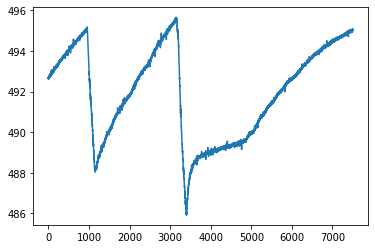

In [ ]:
plt.plot(for25ace65am25_35_prime['Time'],for25ace65am25_35_prime['I1'])

In [ ]:
# Formaldehyde 25 Acetone 65 Ammonia 25
ds_for25_ace65_am25=for25ace65am25_35_prime[0:8002]
con_for25_ace65_am25=np.ones(ds_for25_ace65_am25['Time'].size)*110
sat_for25_ace65_am25=np.zeros(ds_for25_ace65_am25['Time'].size)
rec_for25_ace65_am25=np.zeros(ds_for25_ace65_am25['Time'].size)
class_for25_ace65_am25=np.ones(ds_for25_ace65_am25['Time'].size)*27
j=2340
for i in range(2340,2740):
  sat_for25_ace65_am25[j]=(for25ace65am25_35_prime.at[i,'Time']-for25ace65am25_35_prime.at[2340,'Time'])/(for25ace65am25_35_prime.at[2740,'Time']-for25ace65am25_35_prime.at[2340,'Time'])
  j+=1
for i in range(2741,8002):
  rec_for25_ace65_am25[j]=(for25ace65am25_35_prime.at[i,'Time']-for25ace65am25_35_prime.at[2741,'Time'])/(ds_for25_ace65_am25['Time'].max()-for25ace65am25_35_prime.at[2741,'Time'])
  j+=1
ds_for25_ace65_am25.insert(loc=2,column='concentration',value=con_for25_ace65_am25)
ds_for25_ace65_am25.insert(loc=3,column='saturation',value=sat_for25_ace65_am25)
ds_for25_ace65_am25.insert(loc=4,column='recovery',value=rec_for25_ace65_am25)
ds_for25_ace65_am25.insert(loc=5,column='class',value=class_for25_ace65_am25)

#Formaldehyde 25 Acetone 65 Ammonia 35
ds_for25_ace65_am35=for25ace65am25_35_prime[8003:for25ace65am25_35_prime['Time'].size]
con_for25_ace65_am35=np.ones(ds_for25_ace65_am35['Time'].size)*120
sat_for25_ace65_am35=np.zeros(ds_for25_ace65_am35['Time'].size)
rec_for25_ace65_am35=np.zeros(ds_for25_ace65_am35['Time'].size)
class_for25_ace65_am35=np.ones(ds_for25_ace65_am35['Time'].size)*28
j=0
for i in range(8003,8452):
  sat_for25_ace65_am35[j]=(for25ace65am25_35_prime.at[i,'Time']-ds_for25_ace65_am35['Time'].min())/(for25ace65am25_35_prime.at[8452,'Time']-ds_for25_ace65_am35['Time'].min())
  j+=1
for i in range(8453,for25ace65am25_35_prime['Time'].size):
  rec_for25_ace65_am35[j]=(for25ace65am25_35_prime.at[i,'Time']-for25ace65am25_35_prime.at[8453,'Time'])/(ds_for25_ace65_am35['Time'].max()-for25ace65am25_35_prime.at[8453,'Time'])
  j+=1
ds_for25_ace65_am35.insert(loc=2,column='concentration',value=con_for25_ace65_am35)
ds_for25_ace65_am35.insert(loc=3,column='saturation',value=sat_for25_ace65_am35)
ds_for25_ace65_am35.insert(loc=4,column='recovery',value=rec_for25_ace65_am35)
ds_for25_ace65_am35.insert(loc=5,column='class',value=class_for25_ace65_am35)

In [ ]:
ds_for25_ace65_am25

,Time,I1,concentration,saturation,recovery,class
0,0.00820,492.66,110.0,0.0,0.00000,27.0
1,0.40060,492.66,110.0,0.0,0.00000,27.0
2,0.80050,492.64,110.0,0.0,0.00000,27.0
3,1.20060,492.70,110.0,0.0,0.00000,27.0
4,1.60059,492.66,110.0,0.0,0.00000,27.0
...,...,...,...,...,...,...
7997,3198.80059,494.72,110.0,0.0,0.99943,27.0
7998,3199.20059,494.72,110.0,0.0,0.99962,27.0
7999,3199.60059,494.70,110.0,0.0,0.99981,27.0
8000,3200.00059,494.72,110.0,0.0,1.00000,27.0


In [ ]:
ds_for25_ace65_am35

,Time,I1,concentration,saturation,recovery,class
8003,3201.20059,494.70,120.0,0.000000,0.000000,28.0
8004,3201.60059,494.66,120.0,0.002227,0.000000,28.0
8005,3202.00059,494.60,120.0,0.004454,0.000000,28.0
8006,3202.40059,494.60,120.0,0.006682,0.000000,28.0
8007,3202.80059,494.62,120.0,0.008909,0.000000,28.0
...,...,...,...,...,...,...
18751,7500.40059,495.02,120.0,0.000000,0.999709,28.0
18752,7500.80059,494.98,120.0,0.000000,0.999806,28.0
18753,7501.20059,495.04,120.0,0.000000,0.999903,28.0
18754,7501.60059,495.02,120.0,0.000000,1.000000,28.0


In [ ]:
for25ace65am25_35_prime_new=ds_for25_ace65_am25
for25ace65am25_35_prime_new=for25ace65am25_35_prime_new.append(ds_for25_ace65_am35)

In [ ]:
for25ace65am25_35_prime_new=for25ace65am25_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
for25ace65am25_35_prime_new[['response']]=scaler.fit_transform(for25ace65am25_35_prime_new[['response']])
for25ace65am25_35_prime_new[['concentration']]=scaler.fit_transform(for25ace65am25_35_prime_new[['concentration']])

In [ ]:
for25ace65am25_35_prime_new=for25ace65am25_35_prime_new.reset_index()
for25ace65am25_35_prime_new=for25ace65am25_35_prime_new.drop('index',axis=1)

### Toluene 20 Acetone 65 Ammonia 20-35

In [ ]:
tou20ace65am20_35_prime=pd.read_csv('tou_20_am_20_35_ace_65.csv')

In [ ]:
tou20ace65am20_35_prime

,Time,I1
0,0.00810,504.96
1,0.40060,505.12
2,0.80060,505.10
3,1.20060,504.98
4,1.60059,505.08
...,...,...
30590,12234.80059,504.36
30591,12235.20059,504.34
30592,12235.60060,504.38
30593,12236.00059,504.36


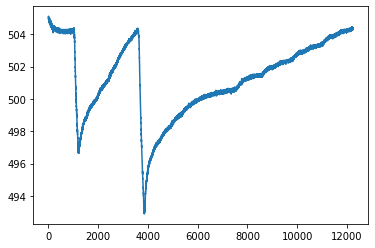

In [ ]:
plt.plot(tou20ace65am20_35_prime['Time'],tou20ace65am20_35_prime['I1'])

In [ ]:
#Toluene 20 Acetone 65 Ammonia 20
ds_tou20_ace65_am20=tou20ace65am20_35_prime[0:9127]
con_tou20_ace65_am20=np.ones(ds_tou20_ace65_am20['Time'].size)*105
sat_tou20_ace65_am20=np.zeros(ds_tou20_ace65_am20['Time'].size)
rec_tou20_ace65_am20=np.zeros(ds_tou20_ace65_am20['Time'].size)
class_tou20_ace65_am20=np.ones(ds_tou20_ace65_am20['Time'].size)*29
j=2627
for i in range(2627,3077):
  sat_tou20_ace65_am20[j]=(tou20ace65am20_35_prime.at[i,'Time']-tou20ace65am20_35_prime.at[2627,'Time'])/(tou20ace65am20_35_prime.at[3077,'Time']-tou20ace65am20_35_prime.at[2627,'Time'])
  j+=1
for i in range(3077,9127):
  rec_tou20_ace65_am20[j]=(tou20ace65am20_35_prime.at[i,'Time']-tou20ace65am20_35_prime.at[3077,'Time'])/(ds_tou20_ace65_am20['Time'].max()-tou20ace65am20_35_prime.at[3077,'Time'])
  j+=1
ds_tou20_ace65_am20.insert(loc=2,column='concentration',value=con_tou20_ace65_am20)
ds_tou20_ace65_am20.insert(loc=3,column='saturation',value=sat_tou20_ace65_am20)
ds_tou20_ace65_am20.insert(loc=4,column='recovery',value=rec_tou20_ace65_am20)
ds_tou20_ace65_am20.insert(loc=5,column='class',value=class_tou20_ace65_am20)

#Toluene 20 Acetone 65 Ammonia 35
ds_tou20_ace65_am35=tou20ace65am20_35_prime[9128:tou20ace65am20_35_prime['Time'].size]
con_tou20_ace65_am35=np.ones(ds_tou20_ace65_am35['Time'].size)*120
sat_tou20_ace65_am35=np.zeros(ds_tou20_ace65_am35['Time'].size)
rec_tou20_ace65_am35=np.zeros(ds_tou20_ace65_am35['Time'].size)
class_tou20_ace65_am35=np.ones(ds_tou20_ace65_am35['Time'].size)*30
j=0
for i in range(9128,9577):
  sat_tou20_ace65_am35[j]=(tou20ace65am20_35_prime.at[i,'Time']-ds_tou20_ace65_am35['Time'].min())/(tou20ace65am20_35_prime.at[9577,'Time']-ds_tou20_ace65_am35['Time'].min())
  j+=1
for i in range(9578,tou20ace65am20_35_prime['Time'].size):
  rec_tou20_ace65_am35[j]=(tou20ace65am20_35_prime.at[i,'Time']-tou20ace65am20_35_prime.at[9578,'Time'])/(ds_tou20_ace65_am35['Time'].max()-tou20ace65am20_35_prime.at[9578,'Time'])
  j+=1
ds_tou20_ace65_am35.insert(loc=2,column='concentration',value=con_tou20_ace65_am35)
ds_tou20_ace65_am35.insert(loc=3,column='saturation',value=sat_tou20_ace65_am35)
ds_tou20_ace65_am35.insert(loc=4,column='recovery',value=rec_tou20_ace65_am35)
ds_tou20_ace65_am35.insert(loc=5,column='class',value=class_tou20_ace65_am35)

In [ ]:
ds_tou20_ace65_am20

,Time,I1,concentration,saturation,recovery,class
0,0.00810,504.96,105.0,0.0,0.000000,29.0
1,0.40060,505.12,105.0,0.0,0.000000,29.0
2,0.80060,505.10,105.0,0.0,0.000000,29.0
3,1.20060,504.98,105.0,0.0,0.000000,29.0
4,1.60059,505.08,105.0,0.0,0.000000,29.0
...,...,...,...,...,...,...
9122,3648.80059,503.18,105.0,0.0,0.999339,29.0
9123,3649.20059,503.20,105.0,0.0,0.999504,29.0
9124,3649.60059,503.12,105.0,0.0,0.999669,29.0
9125,3650.00060,503.22,105.0,0.0,0.999835,29.0


In [ ]:
ds_tou20_ace65_am35

,Time,I1,concentration,saturation,recovery,class
9128,3651.20060,503.10,120.0,0.000000,0.000000,30.0
9129,3651.60059,503.08,120.0,0.002227,0.000000,30.0
9130,3652.00059,503.04,120.0,0.004454,0.000000,30.0
9131,3652.40059,503.00,120.0,0.006681,0.000000,30.0
9132,3652.80059,503.00,120.0,0.008909,0.000000,30.0
...,...,...,...,...,...,...
30590,12234.80059,504.36,120.0,0.000000,0.999857,30.0
30591,12235.20059,504.34,120.0,0.000000,0.999905,30.0
30592,12235.60060,504.38,120.0,0.000000,0.999952,30.0
30593,12236.00059,504.36,120.0,0.000000,1.000000,30.0


In [ ]:
tou20ace65am20_35_prime_new=ds_tou20_ace65_am20
tou20ace65am20_35_prime_new=tou20ace65am20_35_prime_new.append(ds_tou20_ace65_am35)

In [ ]:
tou20ace65am20_35_prime_new=tou20ace65am20_35_prime_new.rename(columns={'I1':'response'})

In [ ]:
tou20ace65am20_35_prime_new

,Time,response,concentration,saturation,recovery,class
0,0.00810,504.96,105.0,0.0,0.000000,29.0
1,0.40060,505.12,105.0,0.0,0.000000,29.0
2,0.80060,505.10,105.0,0.0,0.000000,29.0
3,1.20060,504.98,105.0,0.0,0.000000,29.0
4,1.60059,505.08,105.0,0.0,0.000000,29.0
...,...,...,...,...,...,...
30590,12234.80059,504.36,120.0,0.0,0.999857,30.0
30591,12235.20059,504.34,120.0,0.0,0.999905,30.0
30592,12235.60060,504.38,120.0,0.0,0.999952,30.0
30593,12236.00059,504.36,120.0,0.0,1.000000,30.0


In [ ]:
tou20ace65am20_35_prime_new[['response']]=scaler.fit_transform(tou20ace65am20_35_prime_new[['response']])
tou20ace65am20_35_prime_new[['concentration']]=scaler.fit_transform(tou20ace65am20_35_prime_new[['concentration']])

In [ ]:
tou20ace65am20_35_prime_new

,Time,response,concentration,saturation,recovery,class
0,0.00810,0.986928,0.0,0.0,0.000000,29.0
1,0.40060,1.000000,0.0,0.0,0.000000,29.0
2,0.80060,0.998366,0.0,0.0,0.000000,29.0
3,1.20060,0.988562,0.0,0.0,0.000000,29.0
4,1.60059,0.996732,0.0,0.0,0.000000,29.0
...,...,...,...,...,...,...
30590,12234.80059,0.937908,1.0,0.0,0.999857,30.0
30591,12235.20059,0.936275,1.0,0.0,0.999905,30.0
30592,12235.60060,0.939542,1.0,0.0,0.999952,30.0
30593,12236.00059,0.937908,1.0,0.0,1.000000,30.0


In [ ]:
tou20ace65am20_35_prime_new=tou20ace65am20_35_prime_new.reset_index()
tou20ace65am20_35_prime_new=tou20ace65am20_35_prime_new.drop('index',axis=1)

##Dataset Creation 

In [ ]:
ds_total_prime=am100_50_prime_new
ds_total_prime=ds_total_prime.append(tou75am0_75_prime_new)
ds_total_prime=ds_total_prime.append(tou65am0_50_prime_new)
ds_total_prime=ds_total_prime.append(ace75am0_50_prime_new)
ds_total_prime=ds_total_prime.append(ace65am0_50_prime_new)
ds_total_prime=ds_total_prime.append(for75am0_50_prime_new)
ds_total_prime=ds_total_prime.append(for65am0_35_prime_new)
ds_total_prime=ds_total_prime.append(tou75_65ace20am20_35_prime_new)
ds_total_prime=ds_total_prime.append(tou20ace75am20_35_prime_new)
ds_total_prime=ds_total_prime.append(for65ace20am25_35_prime_new)
ds_total_prime=ds_total_prime.append(for25ace65am25_35_prime_new)
ds_total_prime=ds_total_prime.append(tou20ace65am20_35_prime_new)

In [ ]:
ds_total_prime

,Time,response,concentration,saturation,recovery,class
0,3089.00189,0.981928,0.0,0.000000,0.000000,0.0
1,3089.40188,0.981928,0.0,0.004098,0.000000,0.0
2,3089.80188,1.000000,0.0,0.008197,0.000000,0.0
3,3090.20188,1.000000,0.0,0.012295,0.000000,0.0
4,3090.60188,1.000000,0.0,0.016393,0.000000,0.0
...,...,...,...,...,...,...
30589,12234.80059,0.937908,1.0,0.000000,0.999857,30.0
30590,12235.20059,0.936275,1.0,0.000000,0.999905,30.0
30591,12235.60060,0.939542,1.0,0.000000,0.999952,30.0
30592,12236.00059,0.937908,1.0,0.000000,1.000000,30.0


In [ ]:
ds_total_prime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290076 entries, 0 to 30593
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           290076 non-null  float64
 1   response       290076 non-null  float64
 2   concentration  290076 non-null  float64
 3   saturation     290076 non-null  float64
 4   recovery       290076 non-null  float64
 5   class          290076 non-null  float64
dtypes: float64(6)
memory usage: 15.5 MB


In [ ]:
#ds_total_prime.to_csv('thebigone1.csv')

In [ ]:
ds_total_prime=ds_total_prime.drop('Time',axis=1)


In [ ]:
ds_total_x=ds_total_prime[['response','concentration','saturation','recovery']]
ds_total_y=ds_total_prime[['class']]

In [10]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [11]:
ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [12]:
total_x=ds_total_x.to_numpy(dtype='float32')
total_y=ds_total_y.to_numpy(dtype='float32')

In [13]:
train_x,test_x,train_y,test_y=train_test_split(total_x,total_y,test_size=0.15,random_state=False)

## DL Model

In [14]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [15]:
num_classes = len(np.unique(train_y))


In [16]:
print(num_classes)

31


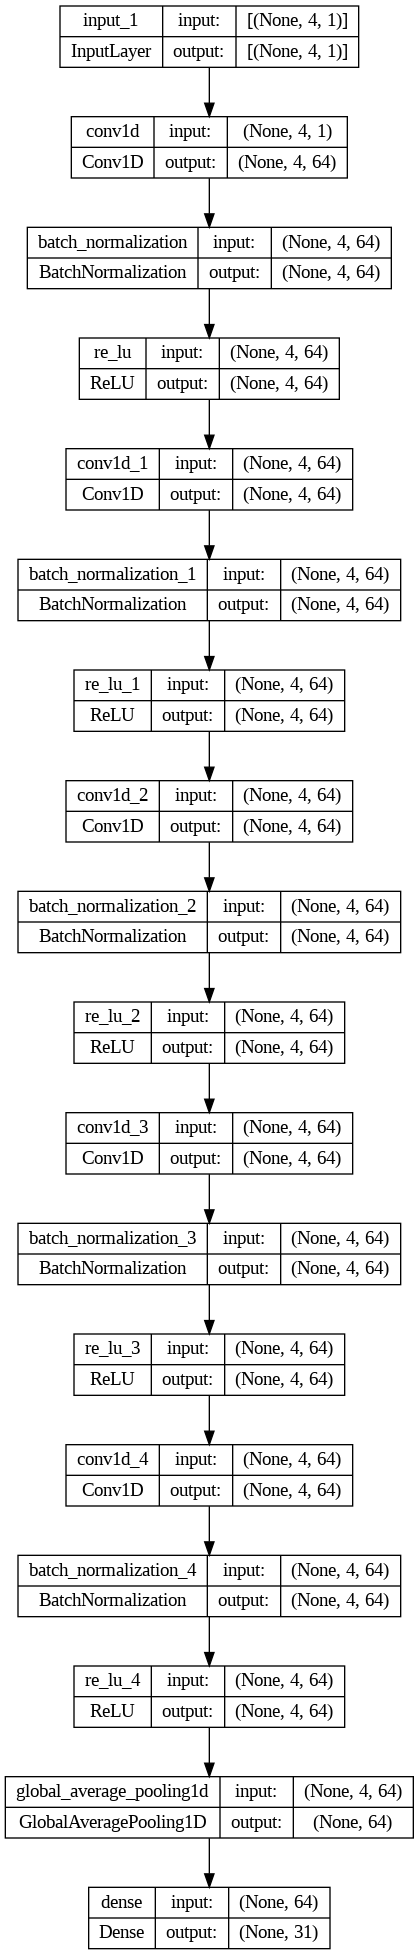

In [17]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    conv4 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)

    conv5 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    gap = keras.layers.GlobalAveragePooling1D()(conv5)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_x.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [18]:
epochs = 100
batch_size = 10

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
19726/19726 [==============================] - 109s 5ms/step - loss: 1.1294 - sparse_categorical_accuracy: 0.5786 - val_loss: 0.7998 - val_sparse_categorical_accuracy: 0.6844 - lr: 0.0010
Epoch 2/100
19726/19726 [==============================] - 105s 5ms/step - loss: 0.7895 - sparse_categorical_accuracy: 0.6871 - val_loss: 0.6076 - val_sparse_categorical_accuracy: 0.7601 - lr: 0.0010
Epoch 3/100
19726/19726 [==============================] - 101s 5ms/step - loss: 0.6998 - sparse_categorical_accuracy: 0.7205 - val_loss: 0.6588 - val_sparse_categorical_accuracy: 0.7282 - lr: 0.0010
Epoch 4/100
19726/19726 [==============================] - 101s 5ms/step - loss: 0.6451 - sparse_categorical_accuracy: 0.7398 - val_loss: 0.5807 - val_sparse_categorical_accuracy: 0.7525 - lr: 0.0010
Epoch 5/100
19726/19726 [==============================] - 102s 5ms/step - loss: 0.6131 - sparse_categorical_accuracy: 0.7522 - val_loss: 0.5189 - val_sparse_categorical_accuracy: 0.7864 - lr: 0.0010


In [19]:
test_loss, test_acc = model.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1360/1360 [==============================] - 6s 4ms/step - loss: 0.3498 - sparse_categorical_accuracy: 0.8547
Test accuracy 0.8546837568283081
Test loss 0.34984779357910156


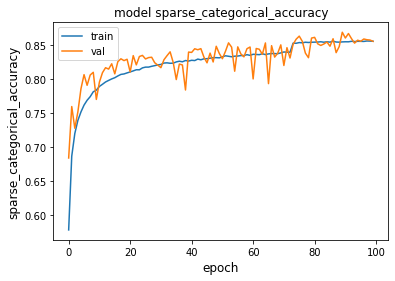

In [20]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

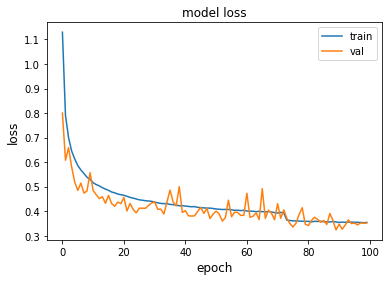

In [21]:
metric1 = "loss"
plt.figure()
plt.plot(history.history[metric1])
plt.plot(history.history["val_" + metric1])
plt.title("model " + metric1)
plt.ylabel(metric1, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
y_pred=model.predict(test_x)
res=[]
for i in y_pred:
  res.append(np.argmax(i))
print(res)

1360/1360 [==============================] - 7s 5ms/step
[11, 6, 7, 24, 4, 30, 15, 18, 14, 15, 14, 26, 16, 18, 13, 16, 18, 27, 5, 15, 6, 7, 26, 18, 28, 26, 28, 11, 11, 25, 25, 30, 18, 27, 29, 18, 7, 15, 8, 11, 28, 30, 30, 13, 12, 11, 13, 30, 27, 6, 26, 13, 30, 17, 25, 25, 16, 13, 13, 29, 15, 26, 20, 22, 16, 16, 28, 25, 6, 21, 27, 6, 7, 17, 16, 13, 24, 26, 18, 14, 14, 9, 16, 18, 6, 12, 29, 25, 13, 28, 7, 22, 18, 30, 9, 13, 30, 15, 26, 24, 18, 12, 7, 11, 30, 30, 28, 25, 29, 6, 22, 18, 13, 26, 26, 29, 18, 25, 7, 26, 30, 16, 6, 24, 12, 28, 25, 17, 13, 6, 29, 6, 16, 4, 12, 11, 25, 25, 26, 9, 3, 30, 25, 25, 30, 13, 29, 6, 28, 17, 24, 9, 30, 17, 12, 16, 30, 25, 29, 29, 25, 12, 13, 17, 10, 25, 27, 18, 25, 3, 30, 14, 18, 26, 10, 30, 18, 26, 18, 13, 8, 17, 6, 18, 14, 26, 28, 14, 12, 30, 11, 21, 16, 17, 9, 18, 6, 26, 18, 17, 6, 28, 11, 13, 23, 13, 29, 30, 16, 7, 18, 24, 7, 28, 25, 30, 17, 21, 26, 7, 10, 29, 14, 25, 25, 18, 18, 6, 6, 18, 17, 17, 28, 14, 27, 29, 22, 26, 30, 14, 28, 14, 21, 11, 15, 

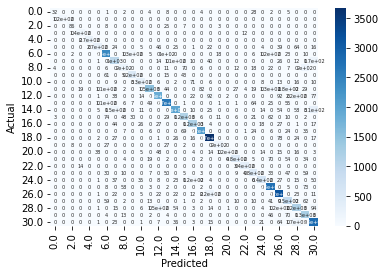

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, res)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [ ]:

print(data)

[[  32    0    0    0    0    0    1    0    2    0    0    4    0    8
     0    0    0    4    0    0    0    0    0   28    0    2    0    5
     0    0    0]
 [   0  123    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0   86    0    0    0    8    0    0    0    0    0    0   25
     0    7    0    0    0    3    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0  145    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   12    0    0    0    0    0
     0    0    0]
 [   0    0    0    0  269    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0  274    0   24    0    0    5    0   46    0
    25    0    1    0   22    0    0    0    0    0    4    0   39    0
    64    0   16]
 [   0    0    2    0    0  

In [ ]:
confusion_mat=np.array(data)

In [ ]:
confusion_mat

array([[  32,    0,    0,    0,    0,    0,    1,    0,    2,    0,    0,
           4,    0,    8,    0,    0,    0,    4,    0,    0,    0,    0,
           0,   28,    0,    2,    0,    5,    0,    0,    0],
       [   0,  123,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   86,    0,    0,    0,    8,    0,    0,    0,    0,
           0,    0,   25,    0,    7,    0,    0,    0,    3,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  145,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          12,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  269,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

In [ ]:
as1=pd.DataFrame(confusion_mat)

In [ ]:
as1.to_excel('c_mat.xlsx')